In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pymongo import MongoClient
import os

# Verbindung zu MongoDB herstellen
client = MongoClient('mongodb://localhost:27017/')
db = client['datenbankname']
collection_m = db['daten_m']  # Sammlung für 'M' Daten
collection_b = db['daten_b']  # Sammlung für 'B' Daten

# Daten aus MongoDB abrufen
data_m = pd.DataFrame(list(collection_m.find()))
data_b = pd.DataFrame(list(collection_b.find()))

# Entfernen der '_id'-Spalte aus der Visualisierung, falls vorhanden
if '_id' in data_m.columns:
    data_m = data_m.drop(columns=['_id'])
if '_id' in data_b.columns:
    data_b = data_b.drop(columns=['_id'])

# Sicherstellen, dass der Ausgabeordner existiert
output_folder_verteilungsplots = 'verteilungsplots'
os.makedirs(output_folder_verteilungsplots, exist_ok=True)

# Sicherstellen, dass der Ausgabeordner existiert
output_folder_wahrscheinlichkeitsplots = 'wahrscheinlichkeitsplots'
os.makedirs(output_folder_wahrscheinlichkeitsplots, exist_ok=True)

# Sicherstellen, dass der Ausgabeordner existiert
output_folder_korrelationsplots = 'korrelationsplots'
os.makedirs(output_folder_korrelationsplots, exist_ok=True)

C:\Users\Hannah\AppData\Local\Temp\ipykernel_10444\1536390071.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(14, 7))


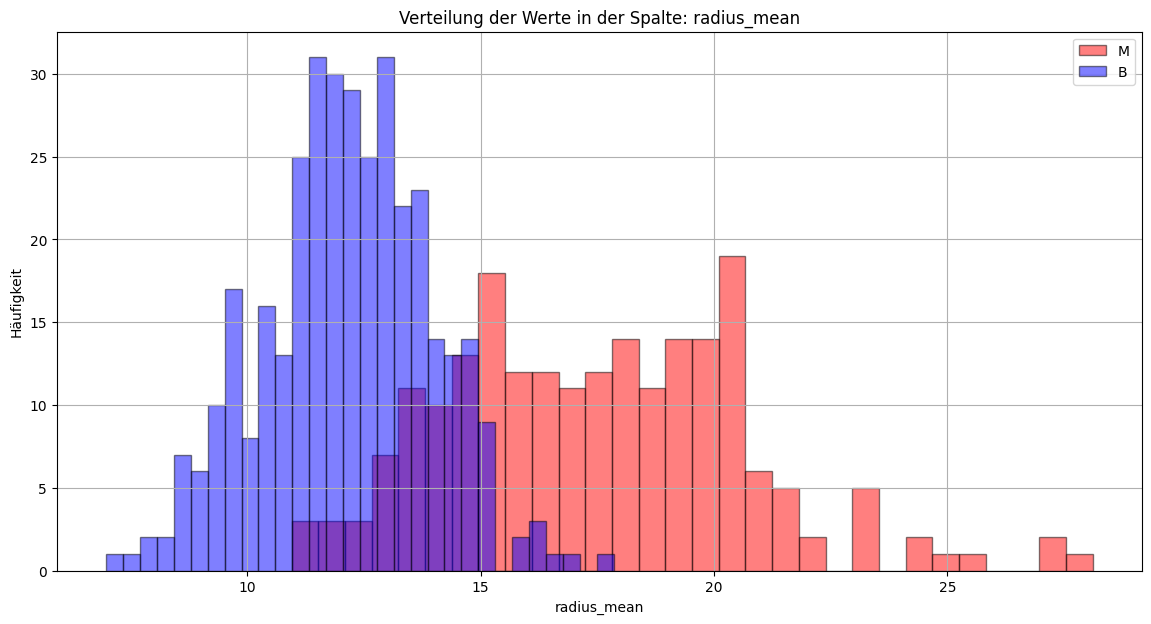

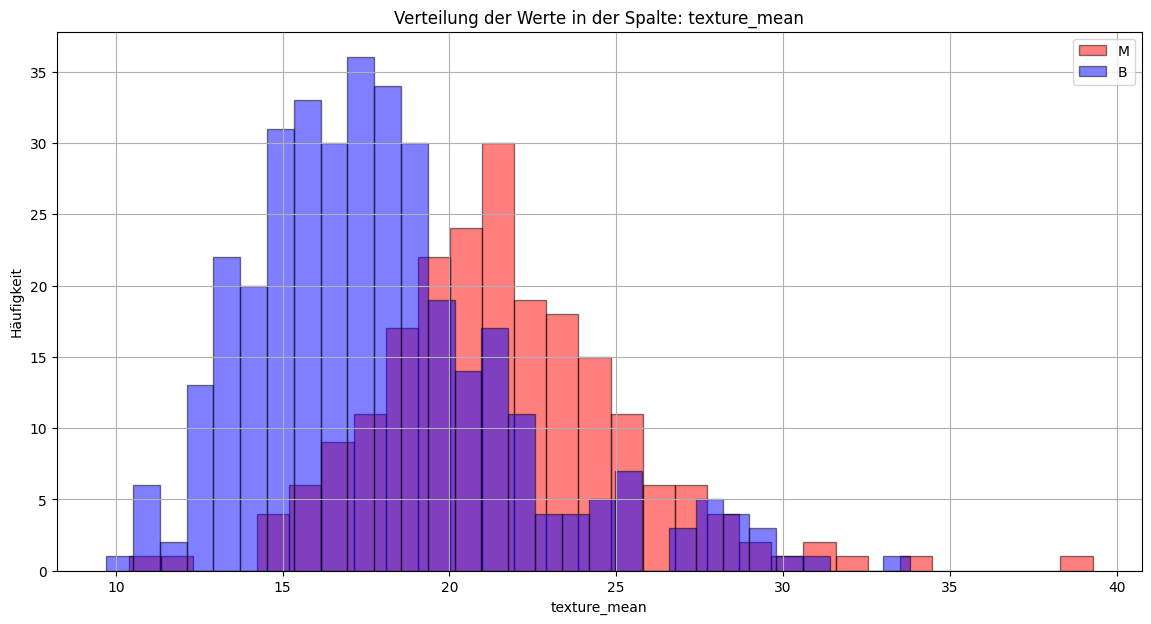

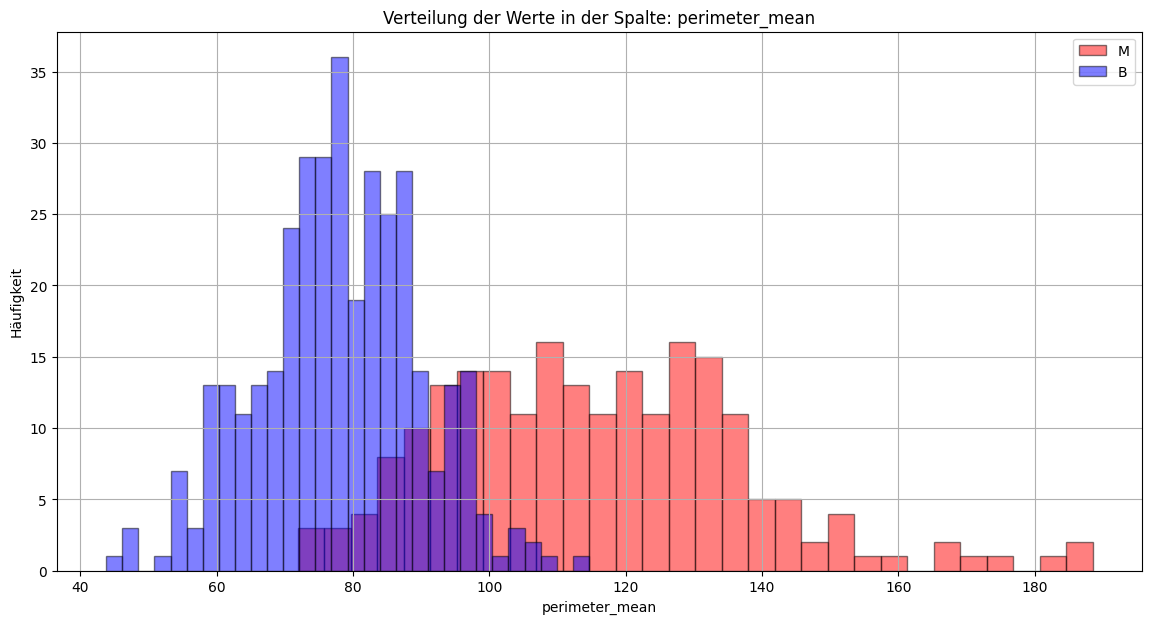

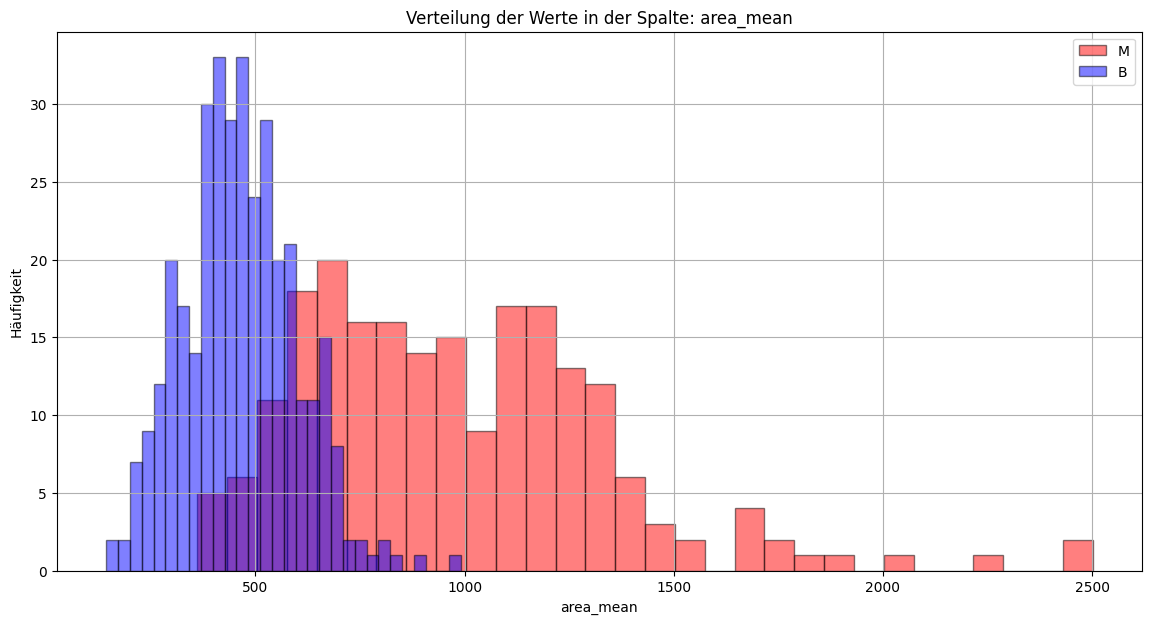

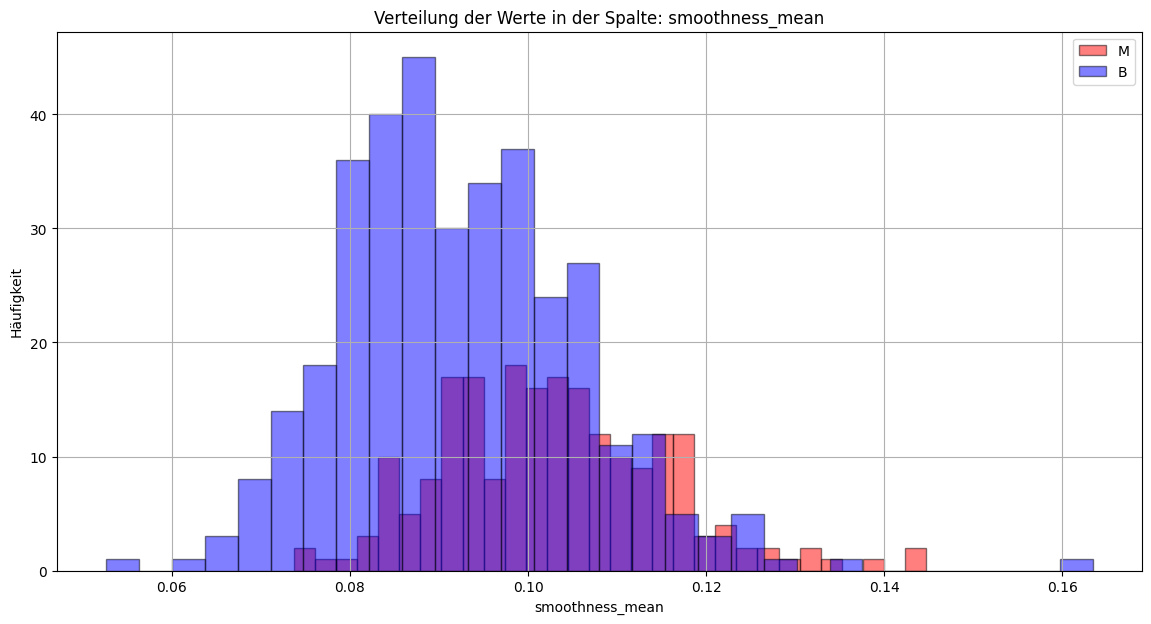

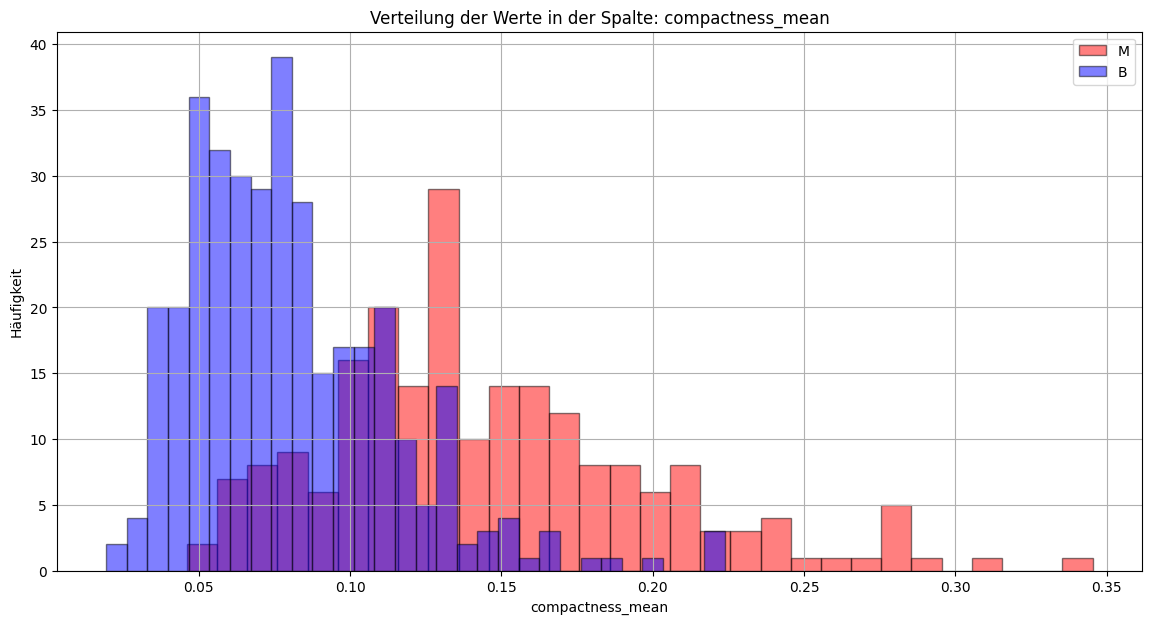

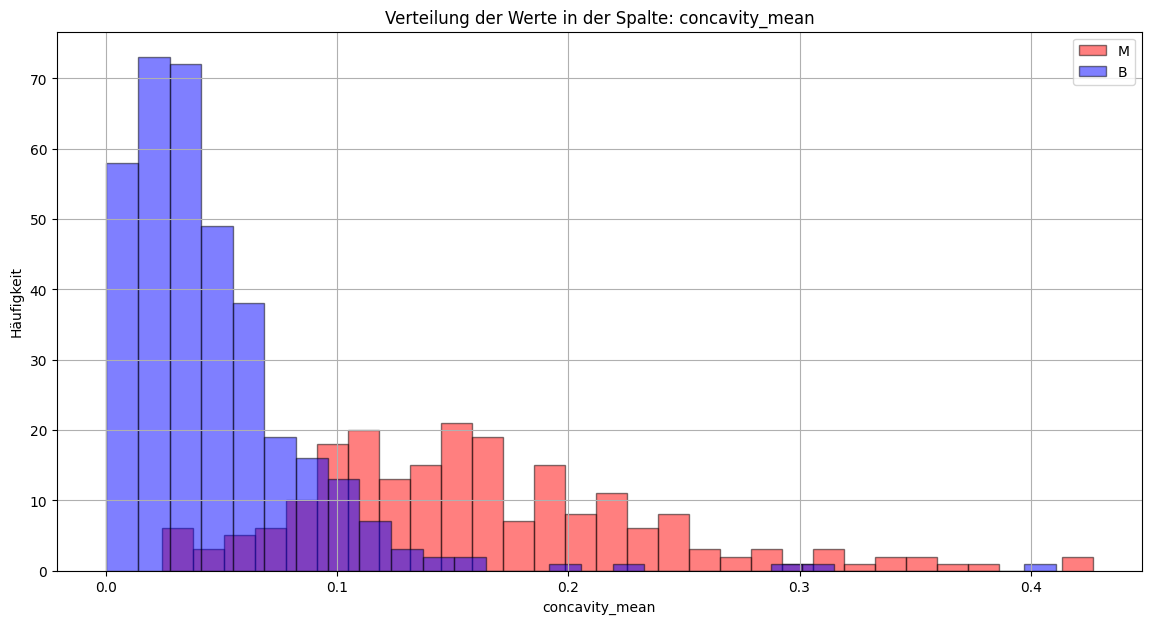

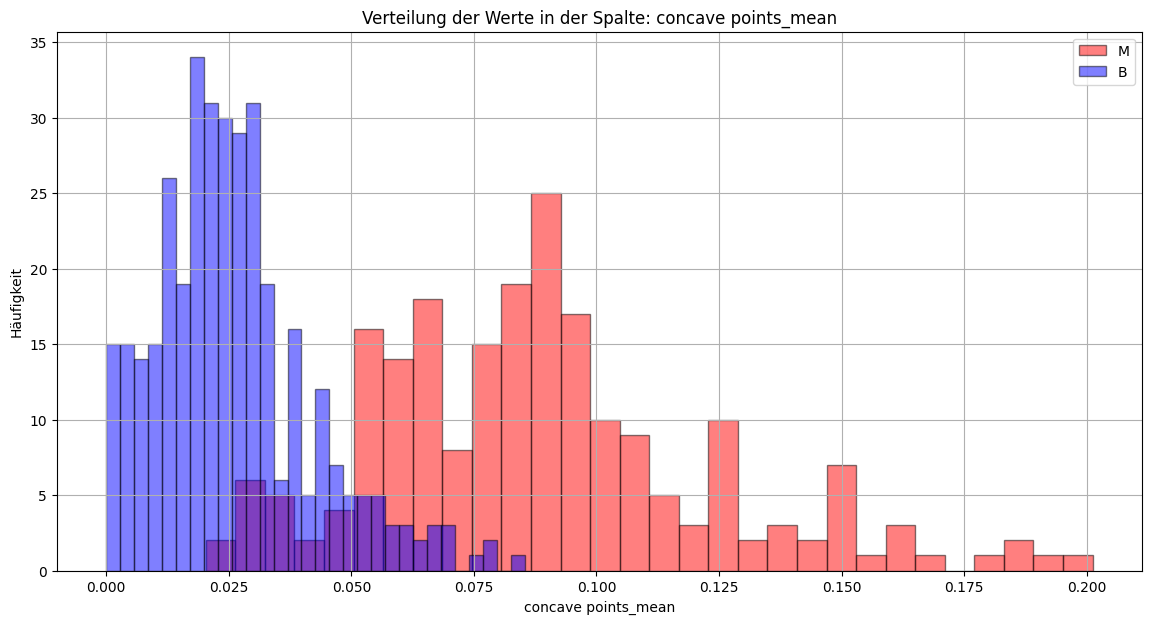

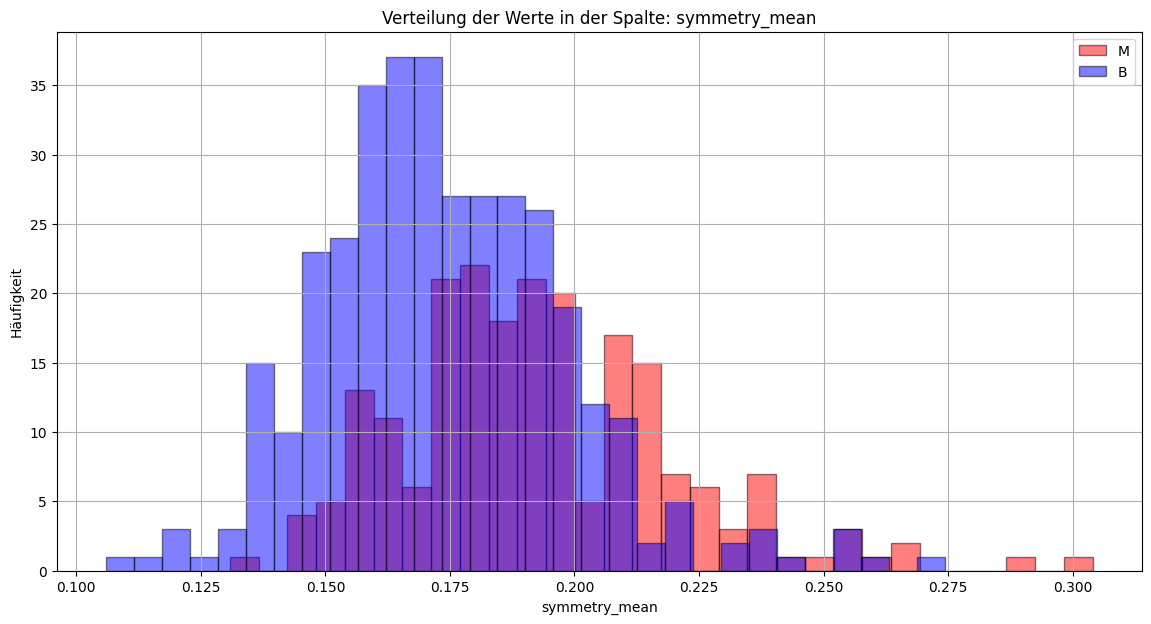

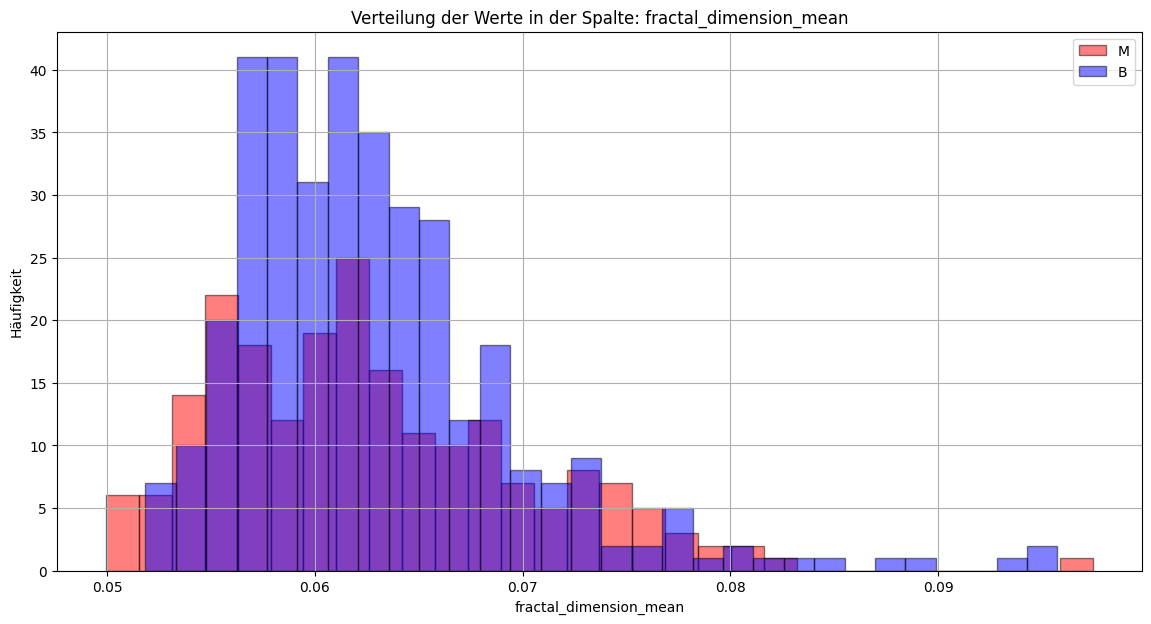

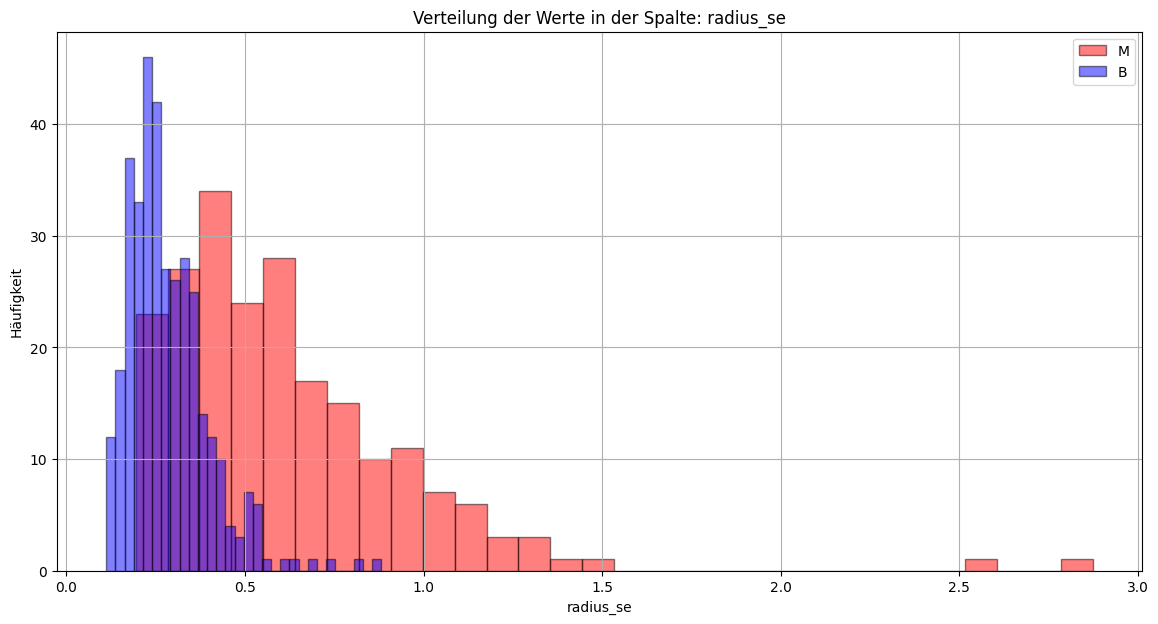

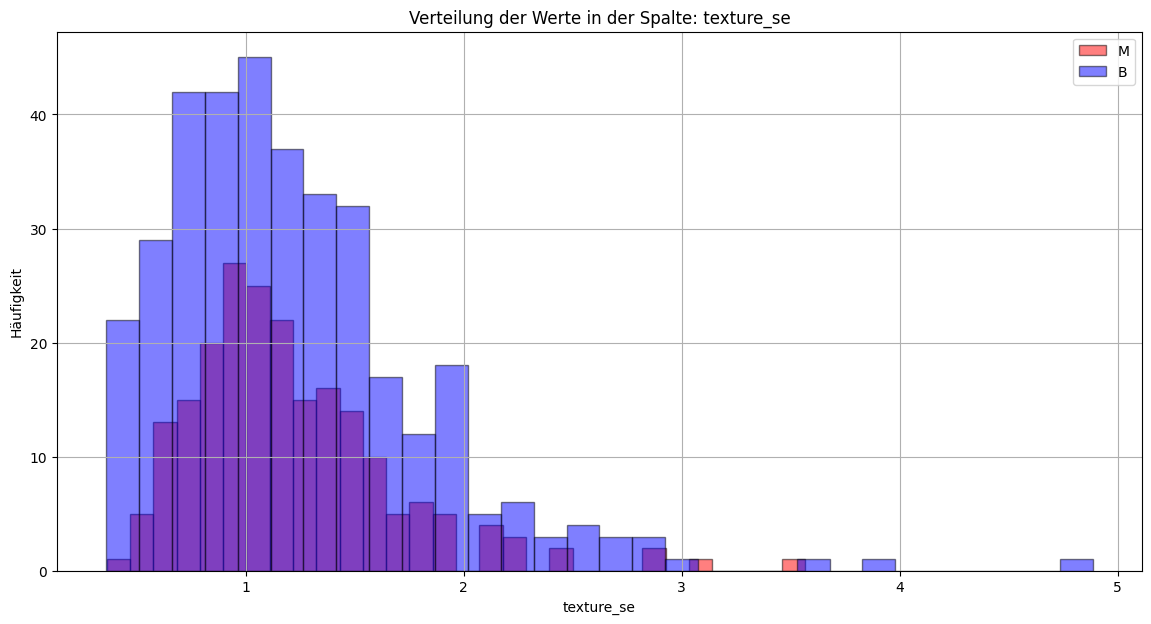

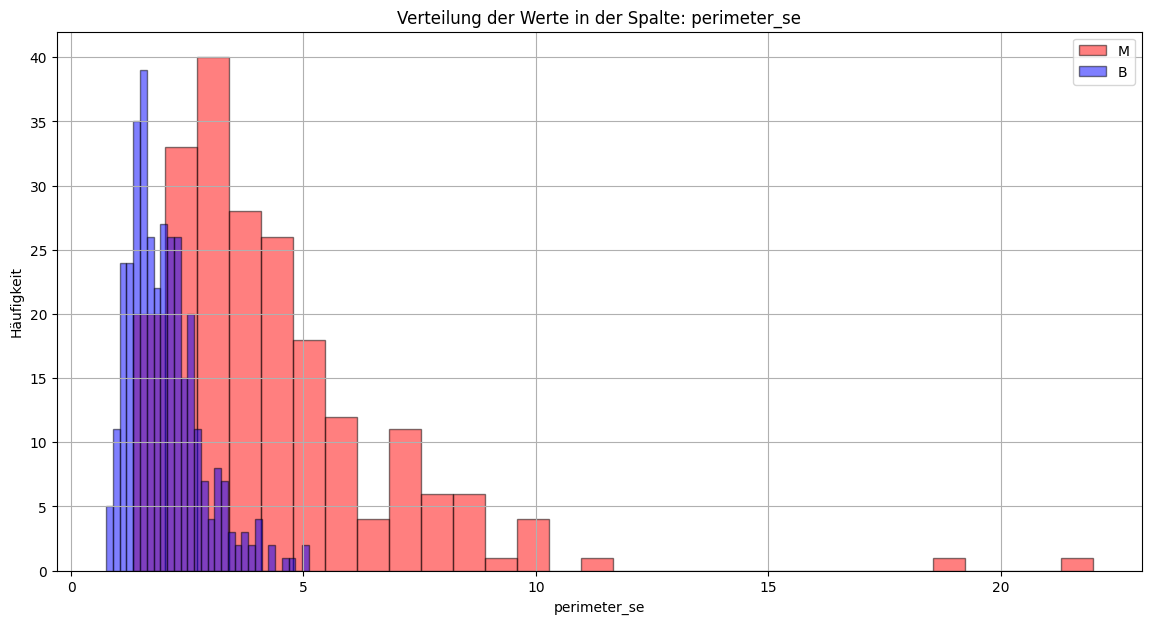

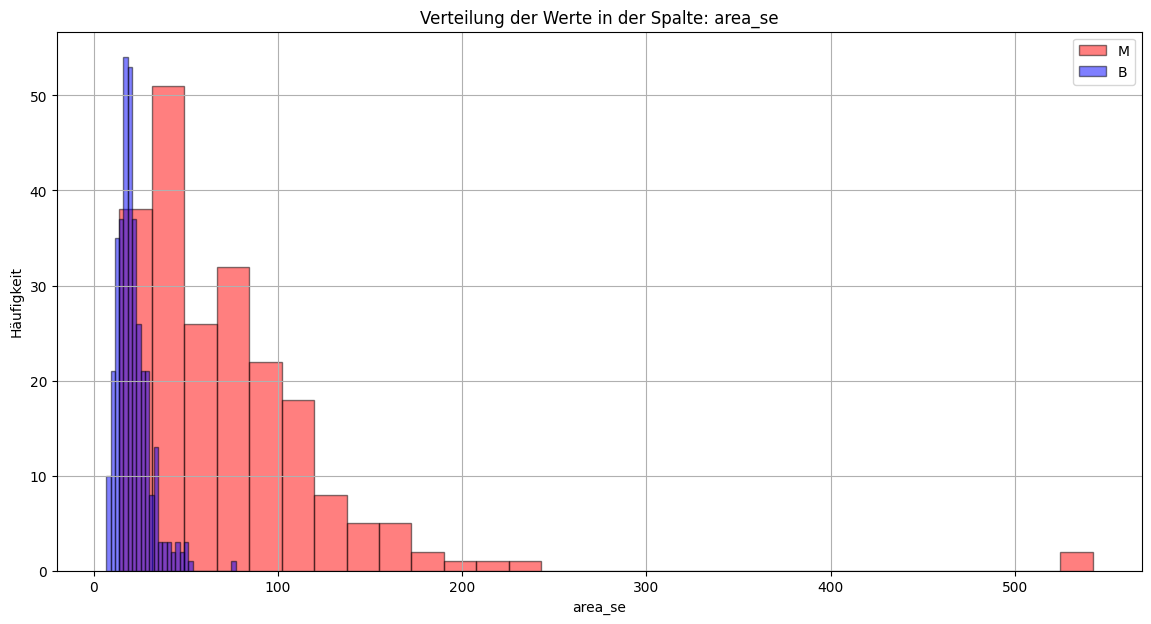

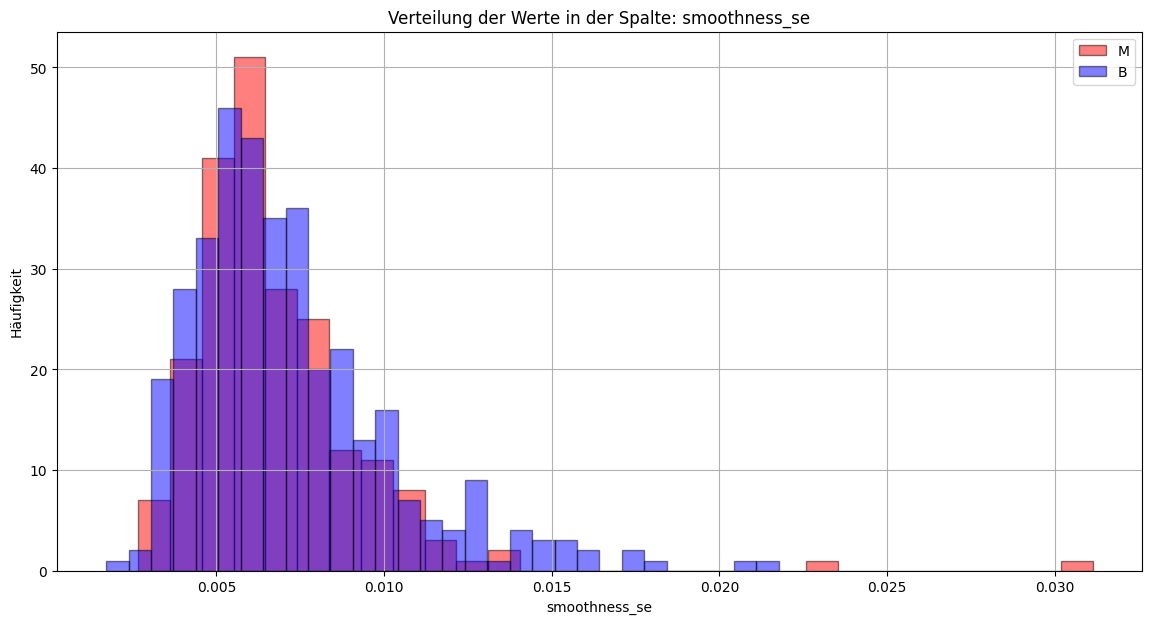

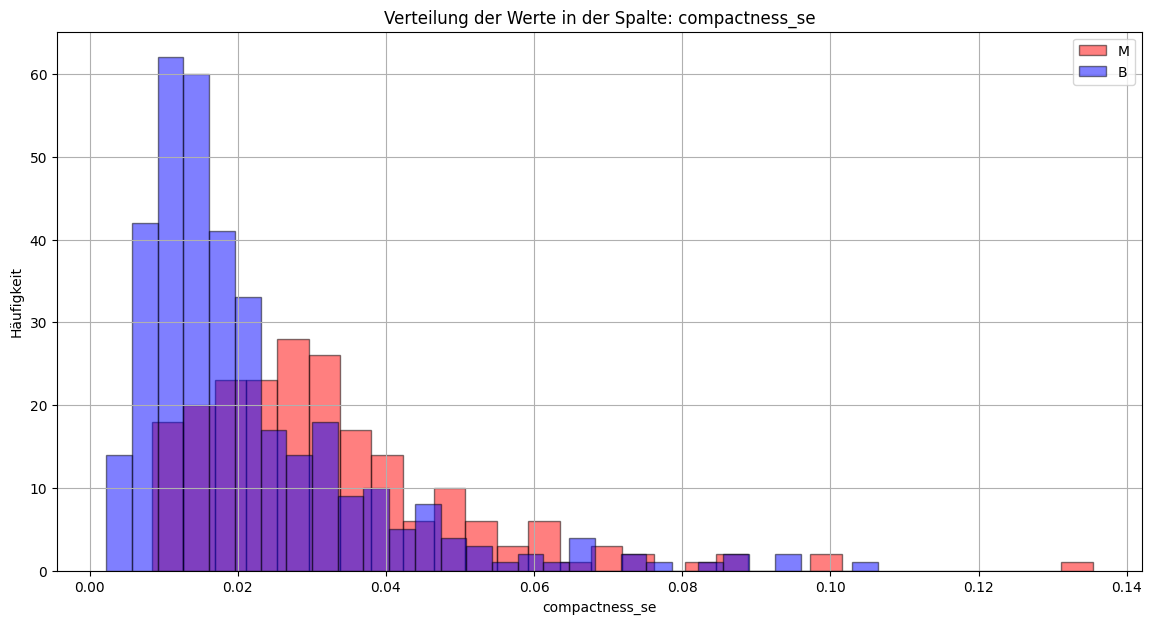

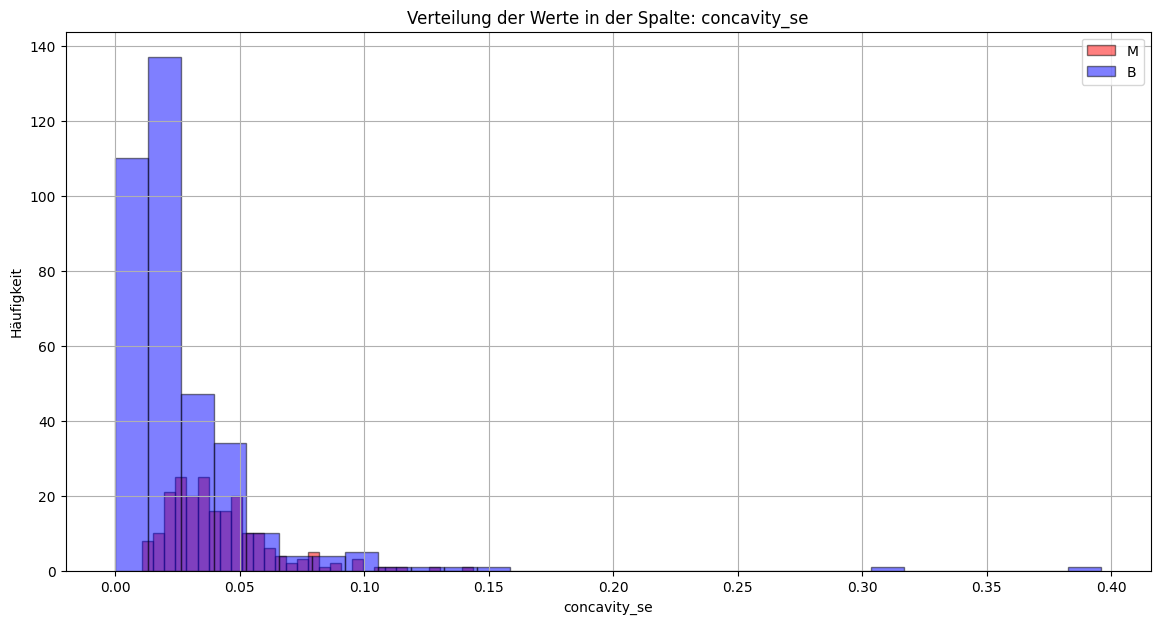

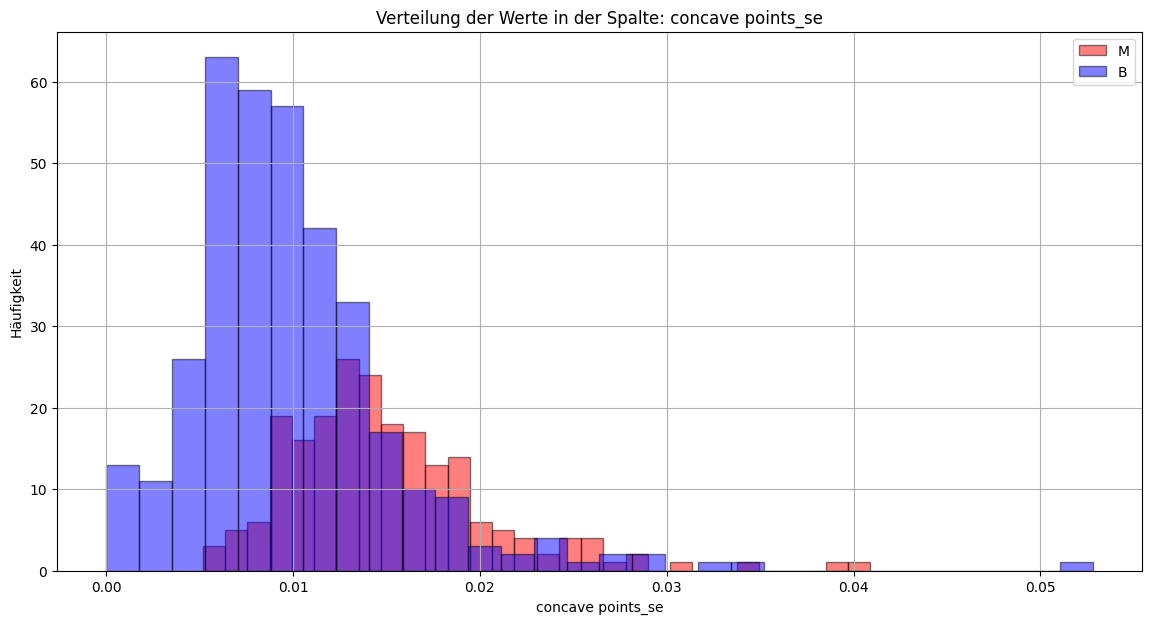

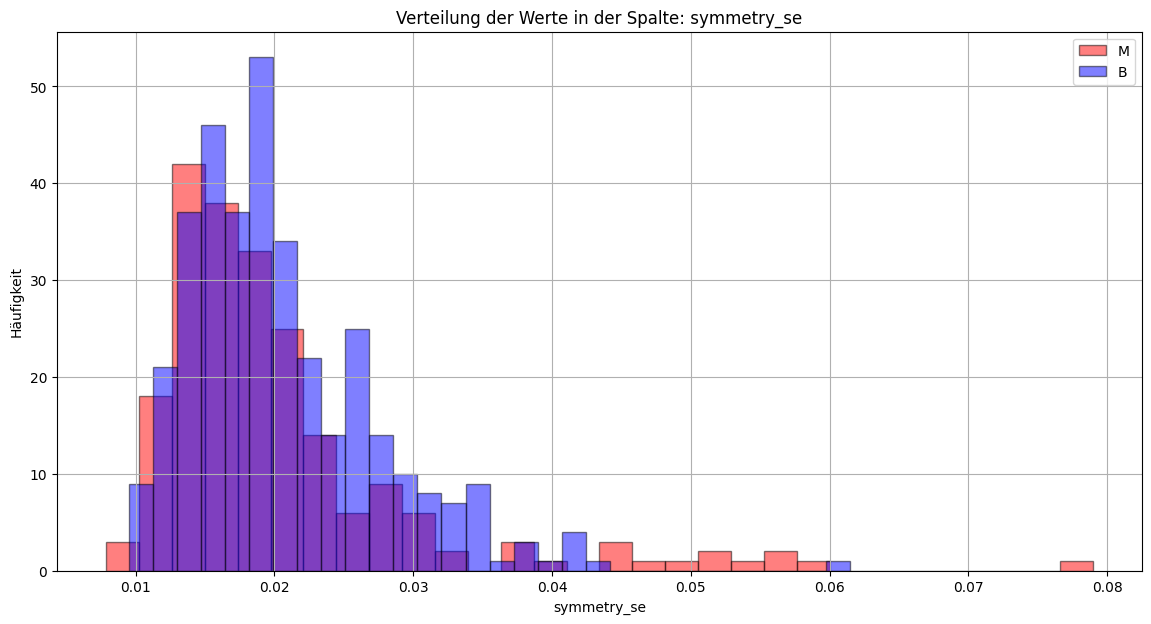

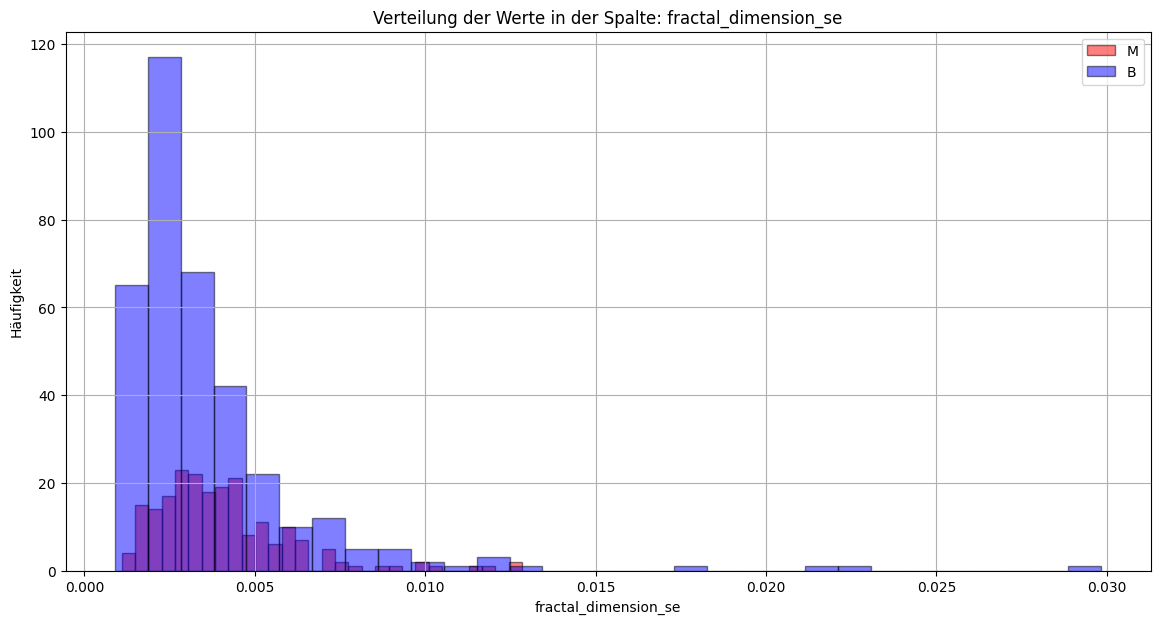

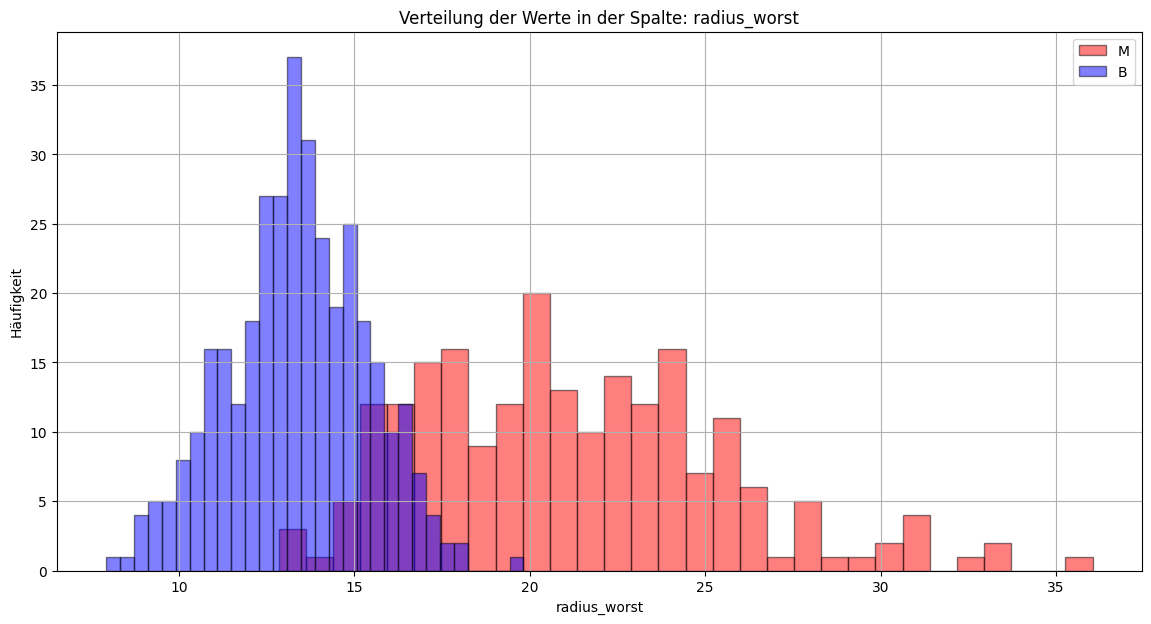

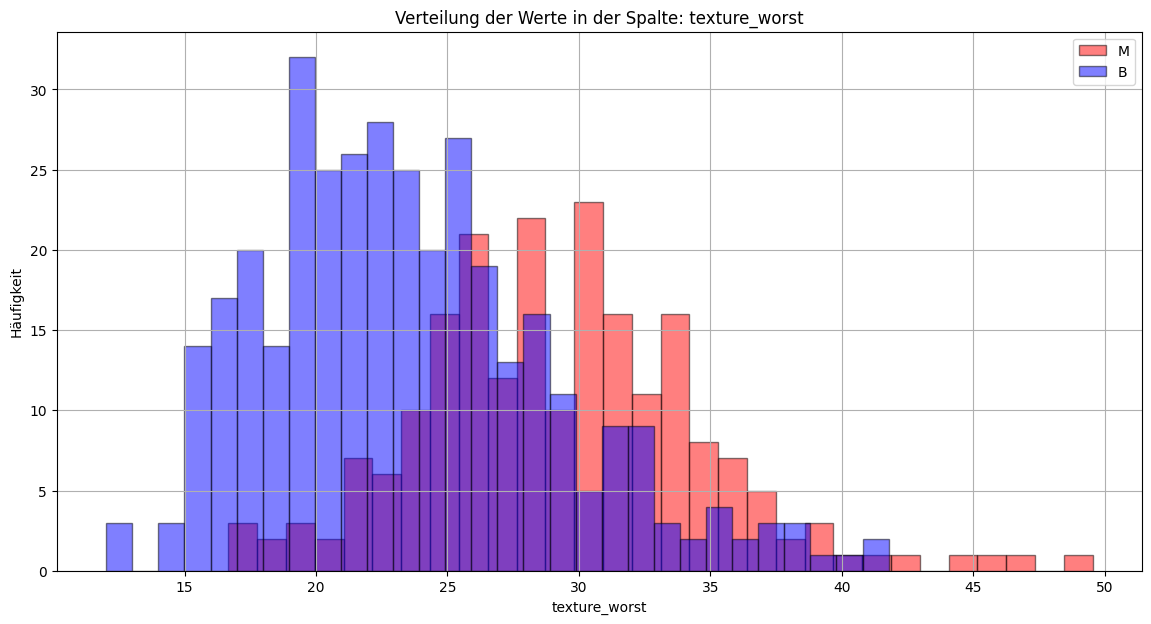

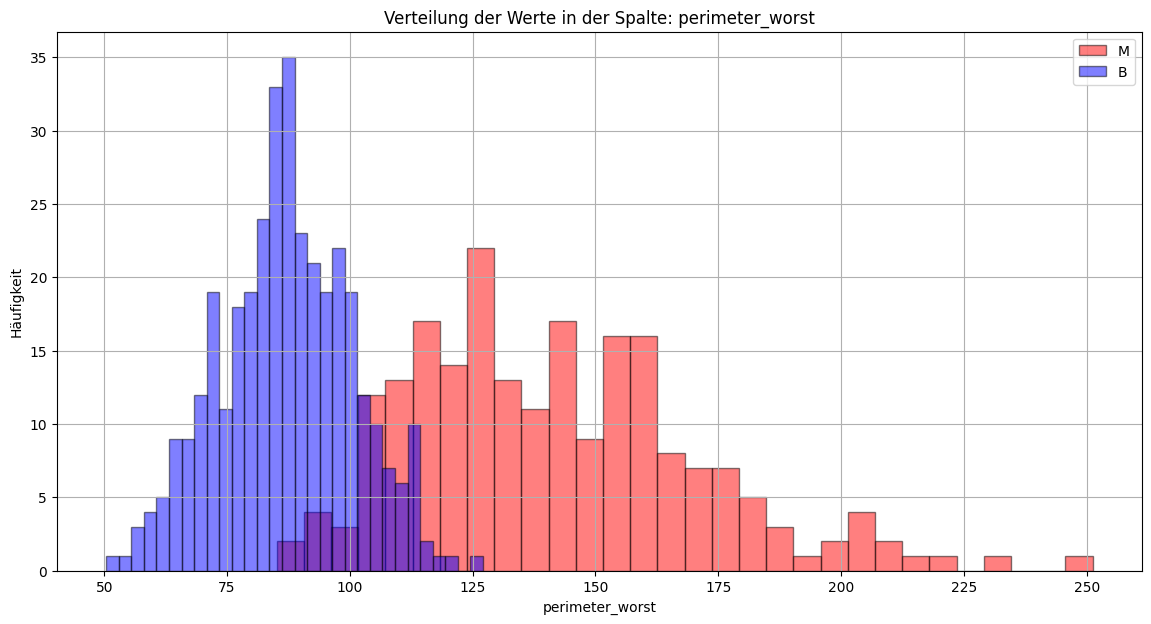

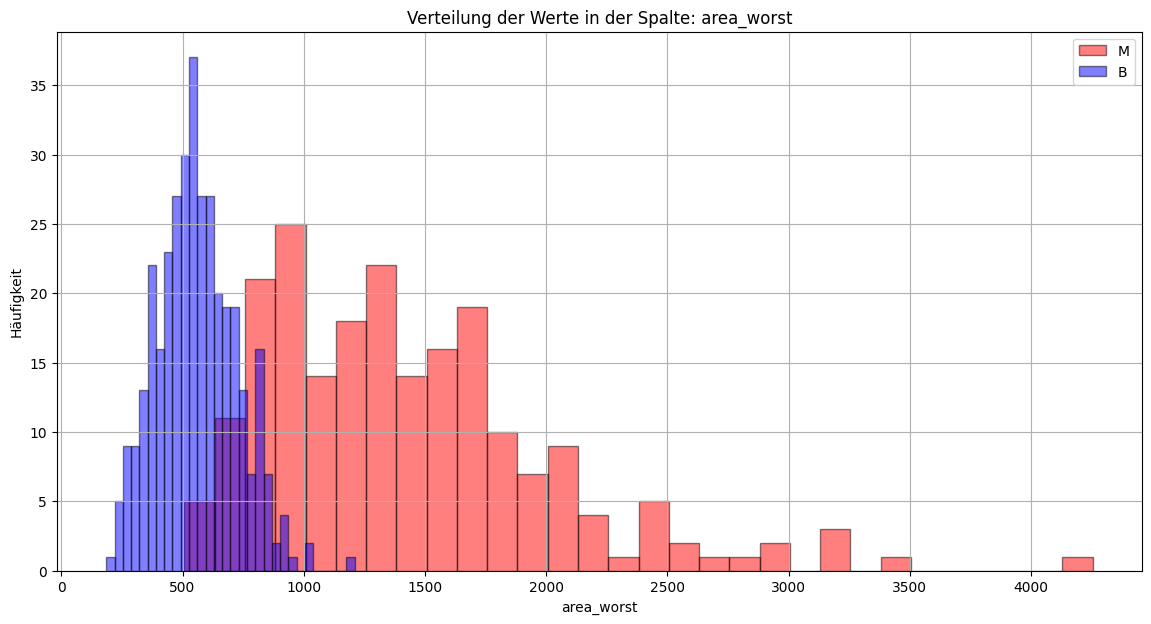

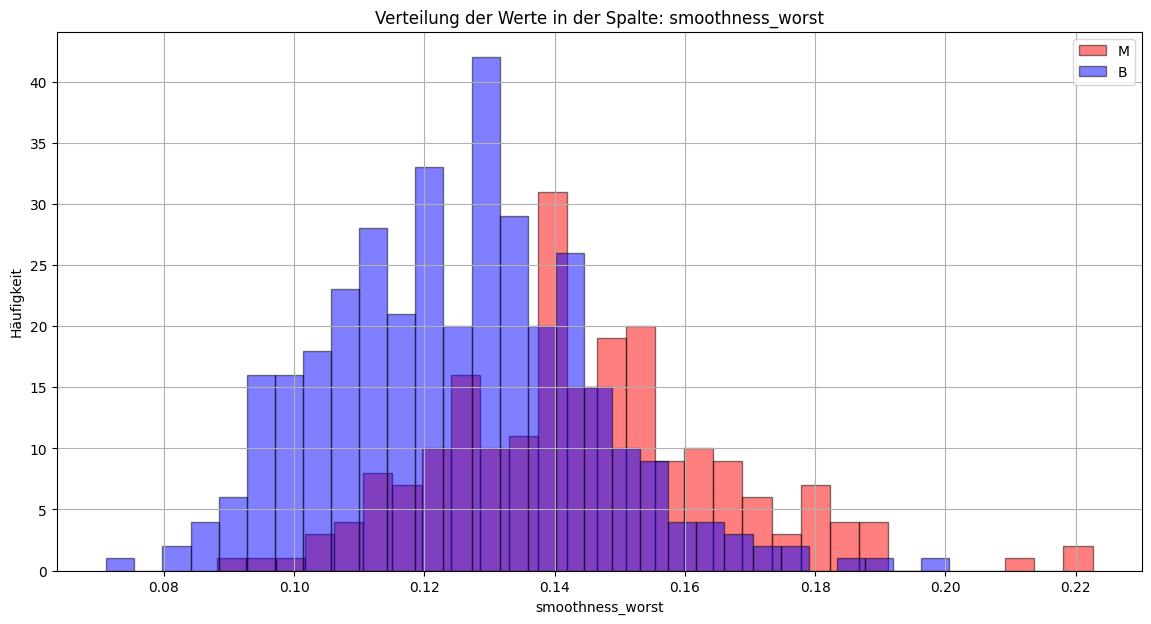

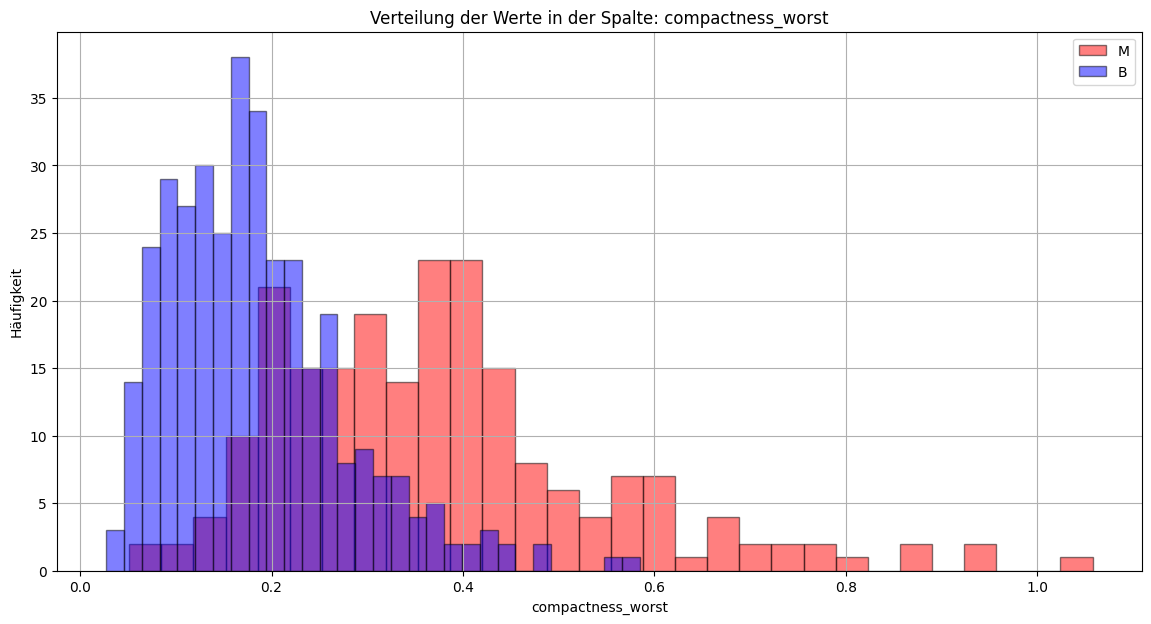

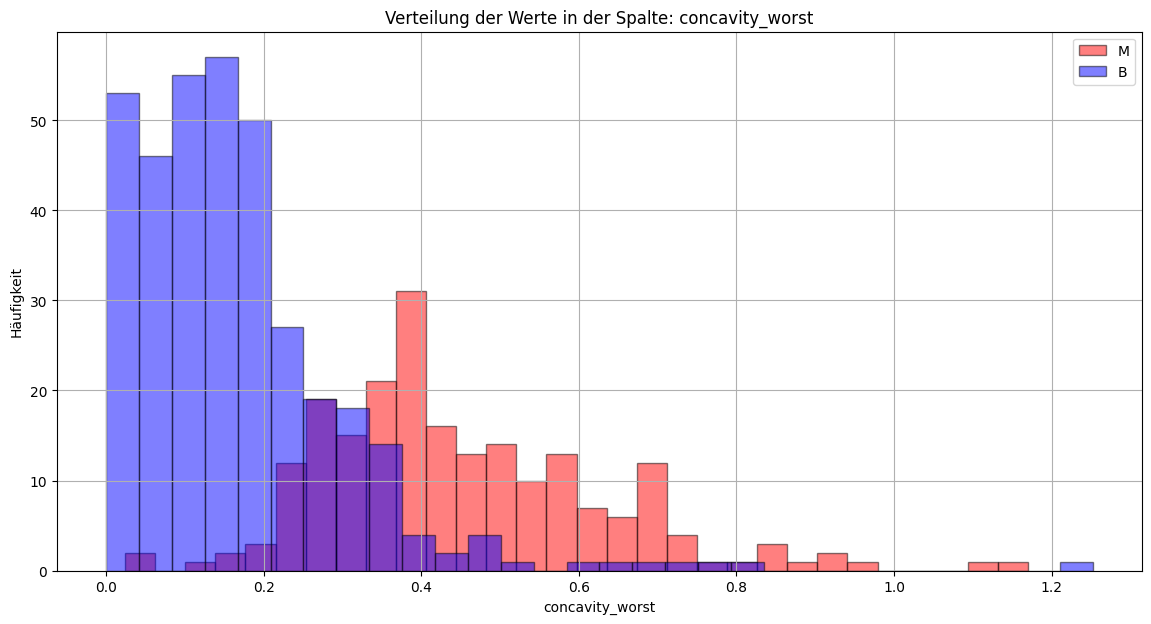

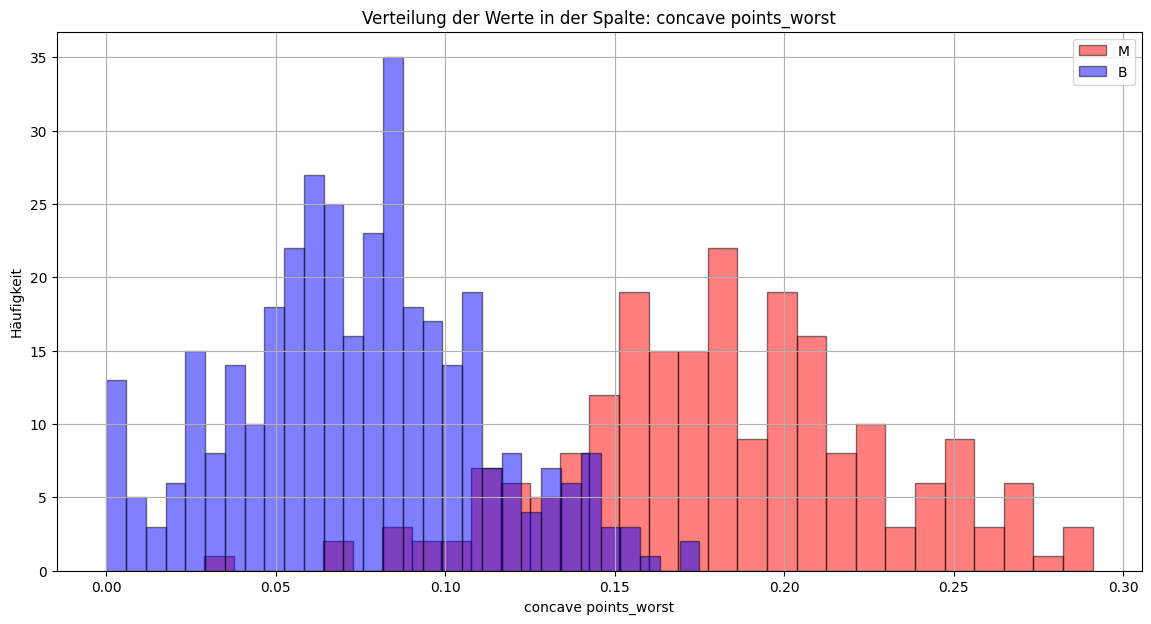

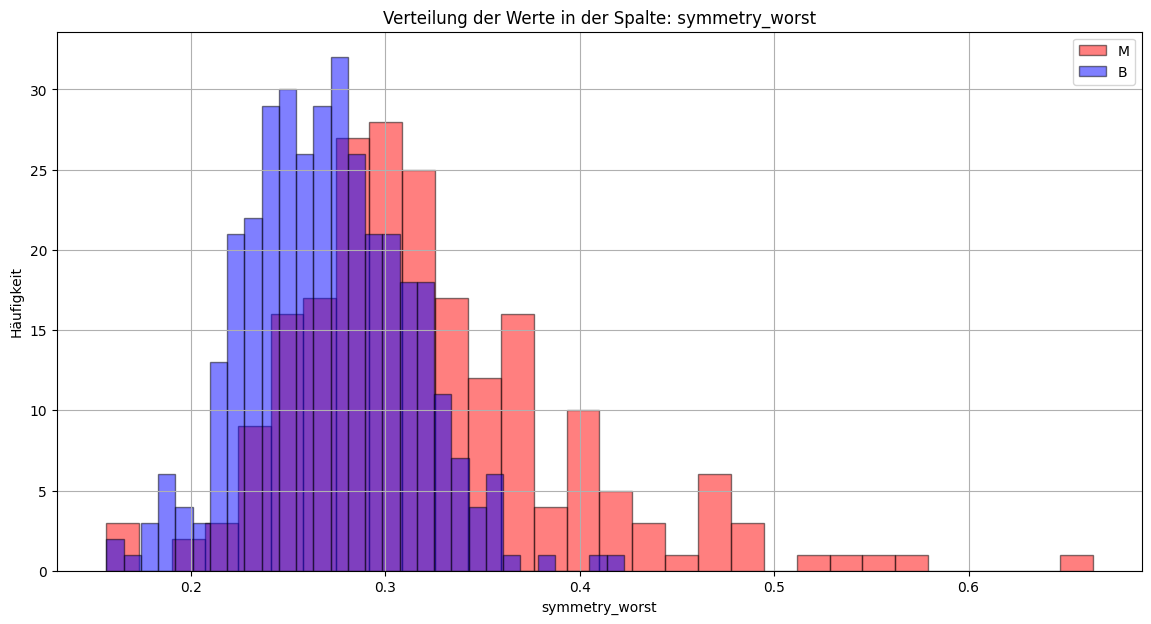

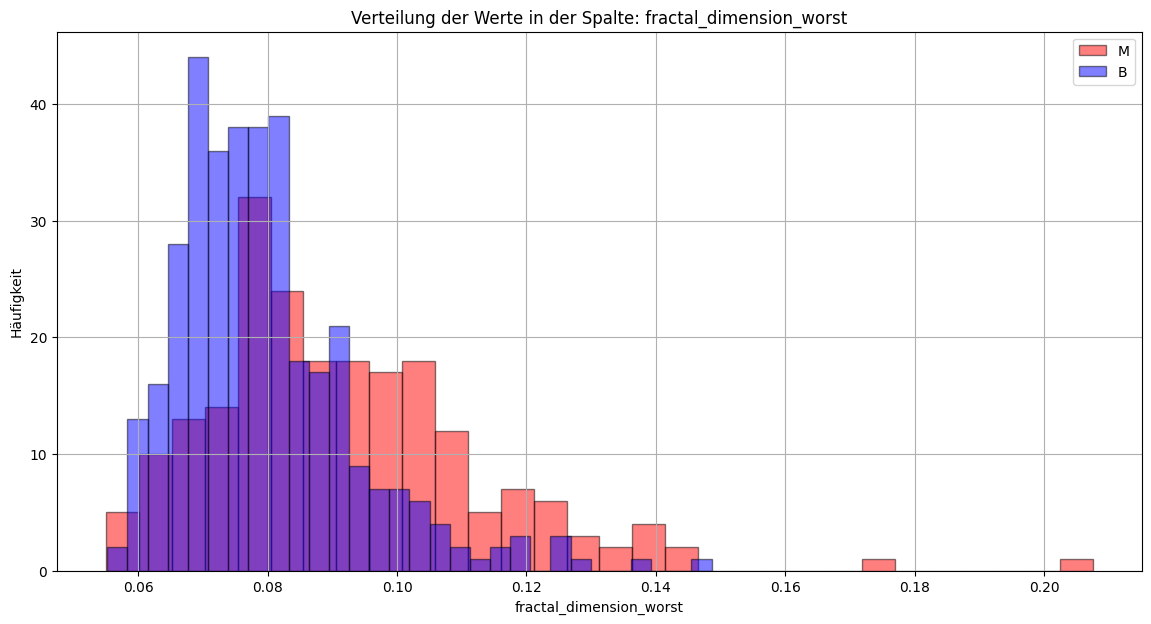

In [18]:
# Plot für jede numerische Spalte erstellen
for spalte in numerische_spalten_m:
    if spalte in numerische_spalten_b:  # Sicherstellen, dass die Spalte in beiden Datensätzen existiert
        plt.figure(figsize=(14, 7))
        plt.hist(data_m[spalte], bins=30, alpha=0.5, label='M', color='red', edgecolor='black')
        plt.hist(data_b[spalte], bins=30, alpha=0.5, label='B', color='blue', edgecolor='black')
        plt.title(f'Verteilung der Werte in der Spalte: {spalte}')
        plt.xlabel(spalte)
        plt.ylabel('Häufigkeit')
        plt.legend()
        plt.grid(True)

In [19]:
# Plot für jede numerische Spalte erstellen und speichern
for spalte in numerische_spalten_m:
    if spalte in numerische_spalten_b:  # Sicherstellen, dass die Spalte in beiden Datensätzen existiert
        plt.figure(figsize=(14, 7))
        plt.hist(data_m[spalte], bins=30, alpha=0.5, label='M', color='red', edgecolor='black')
        plt.hist(data_b[spalte], bins=30, alpha=0.5, label='B', color='blue', edgecolor='black')
        plt.title(f'Verteilung der Werte in der Spalte: {spalte}')
        plt.xlabel(spalte)
        plt.ylabel('Häufigkeit')
        plt.legend()
        plt.grid(True)

        # Plot als PNG-Datei speichern
        plot_path = os.path.join(output_folder_verteilungsplots, f'verteilung_{spalte}.png')
        plt.savefig(plot_path)
        plt.close()

print(f"Die Verteilungsplots wurden im Ordner '{output_folder_verteilungsplots}' gespeichert.")

Die Verteilungsplots wurden im Ordner 'verteilungsplots' gespeichert.


C:\Users\Hannah\AppData\Local\Temp\ipykernel_10444\1172630133.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(14, 7))


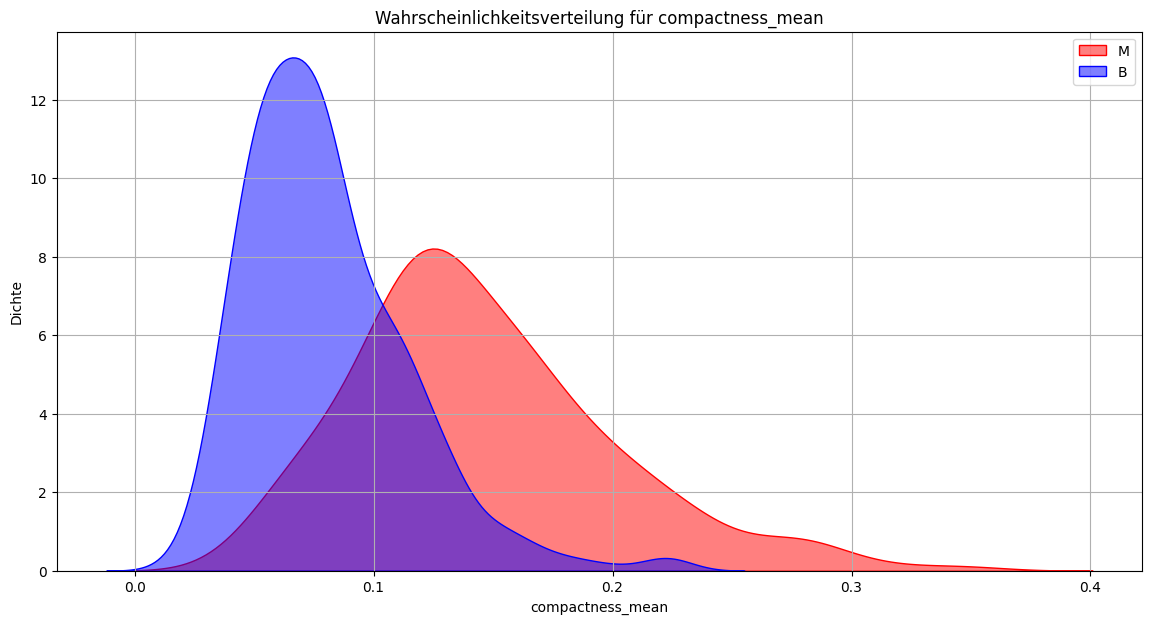

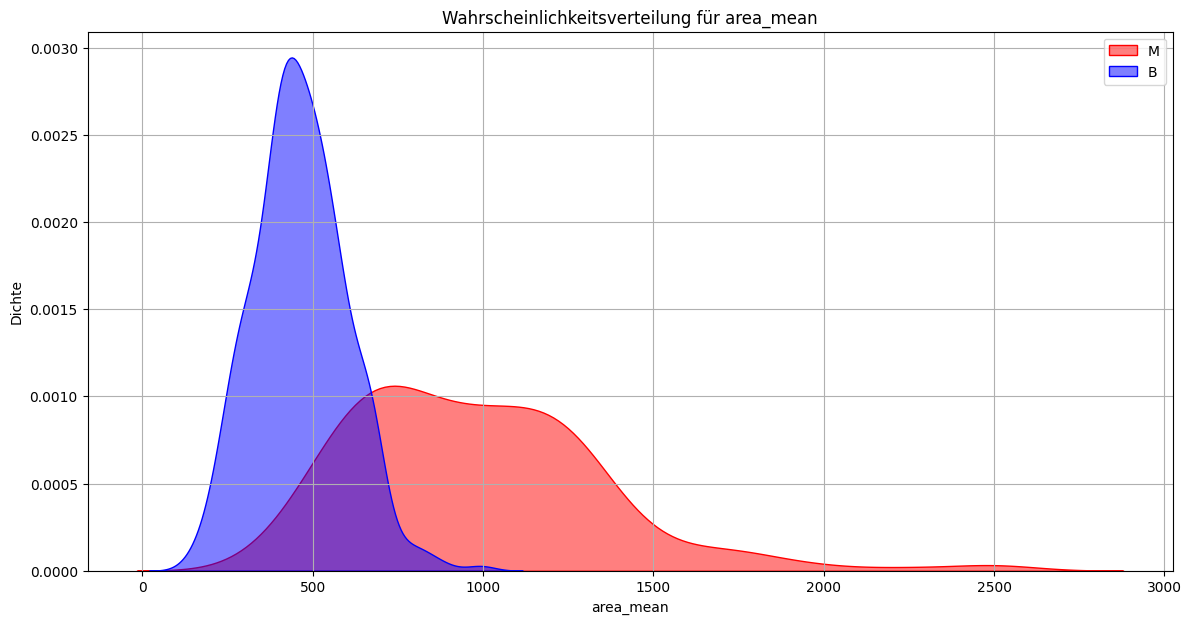

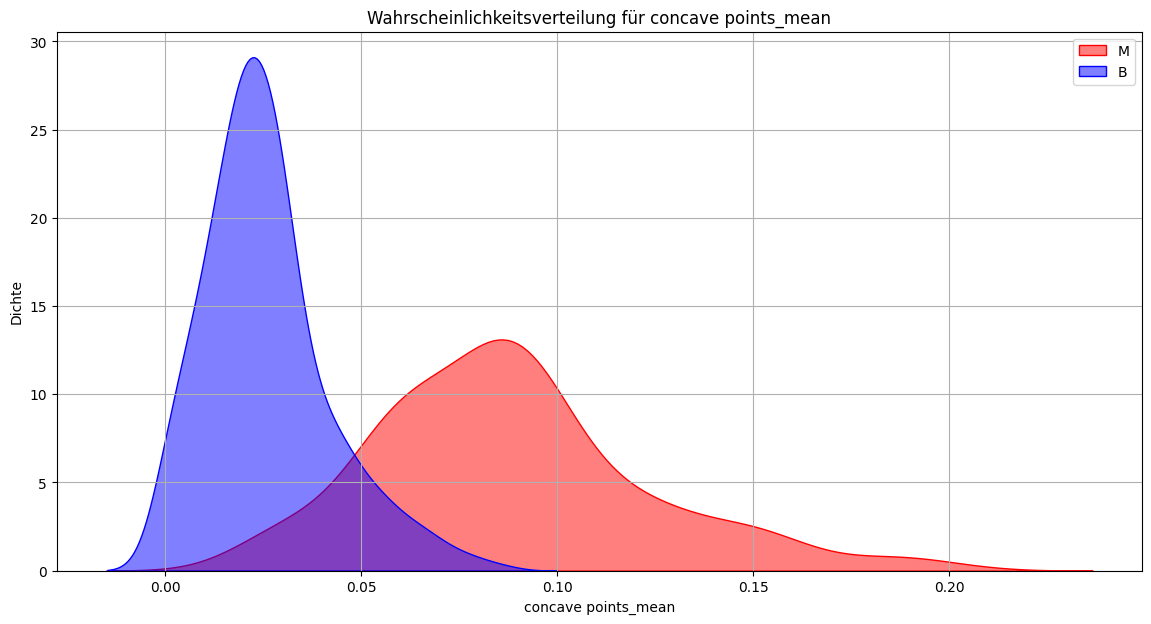

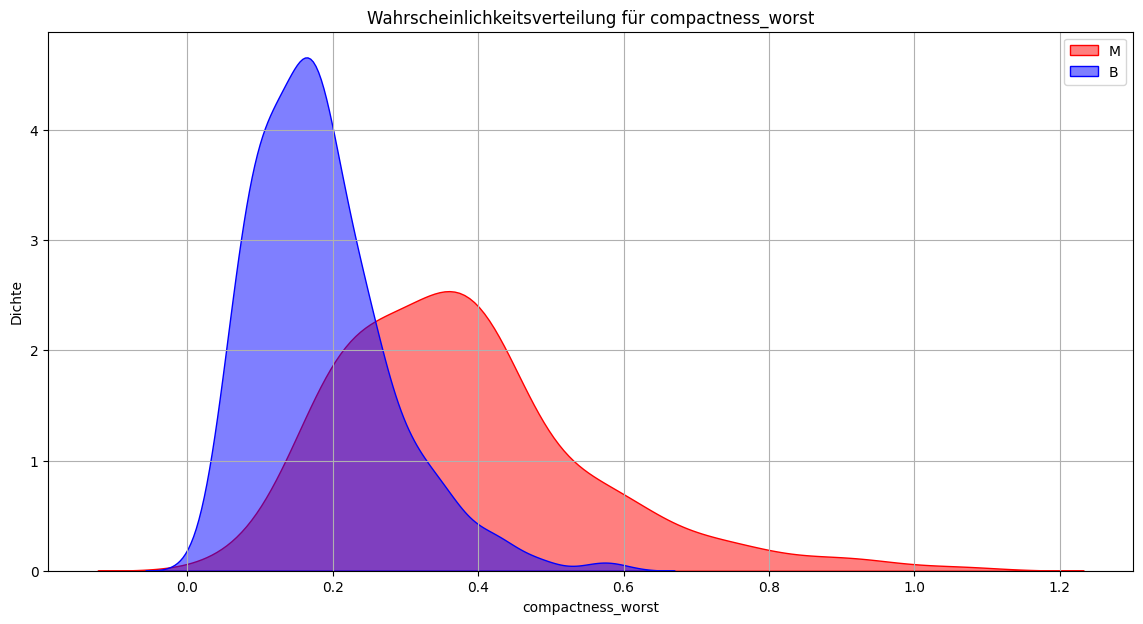

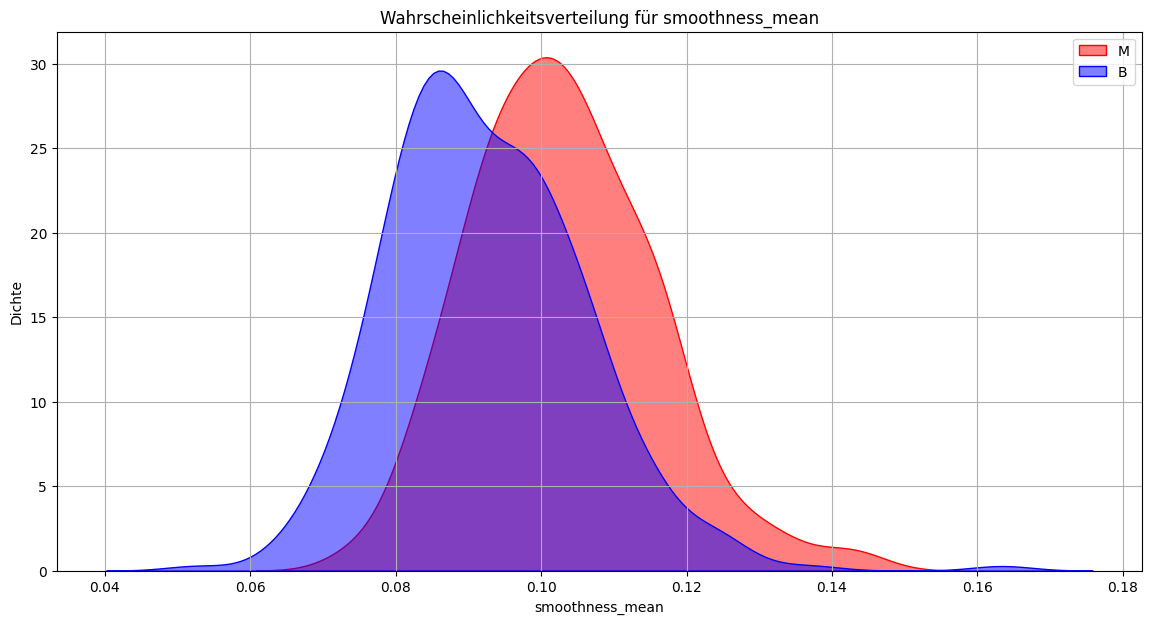

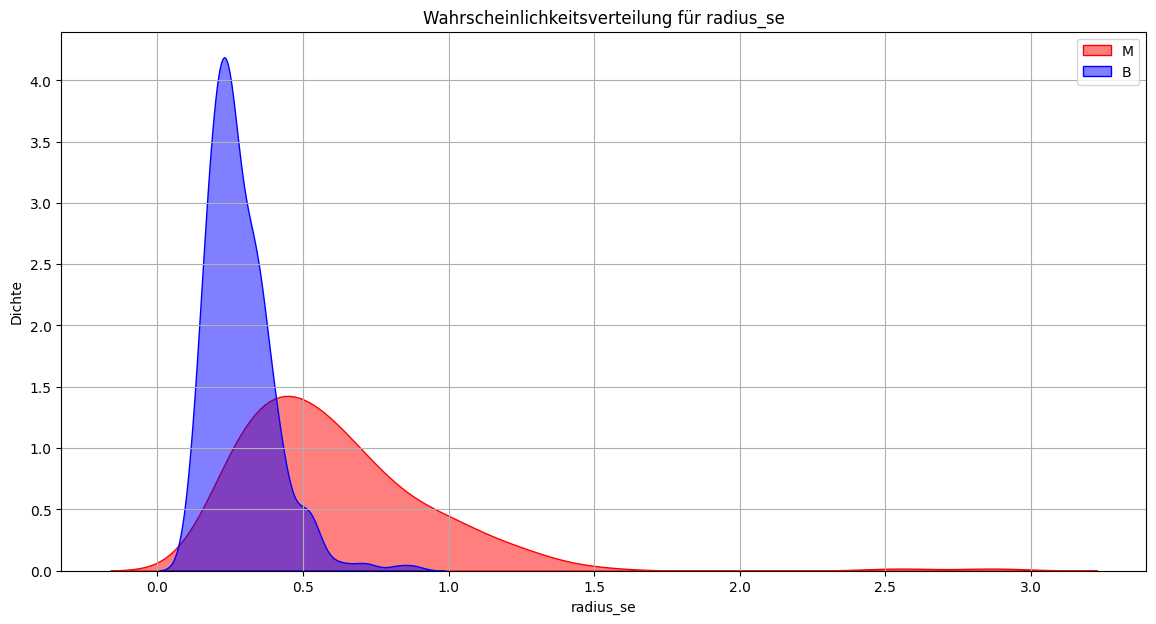

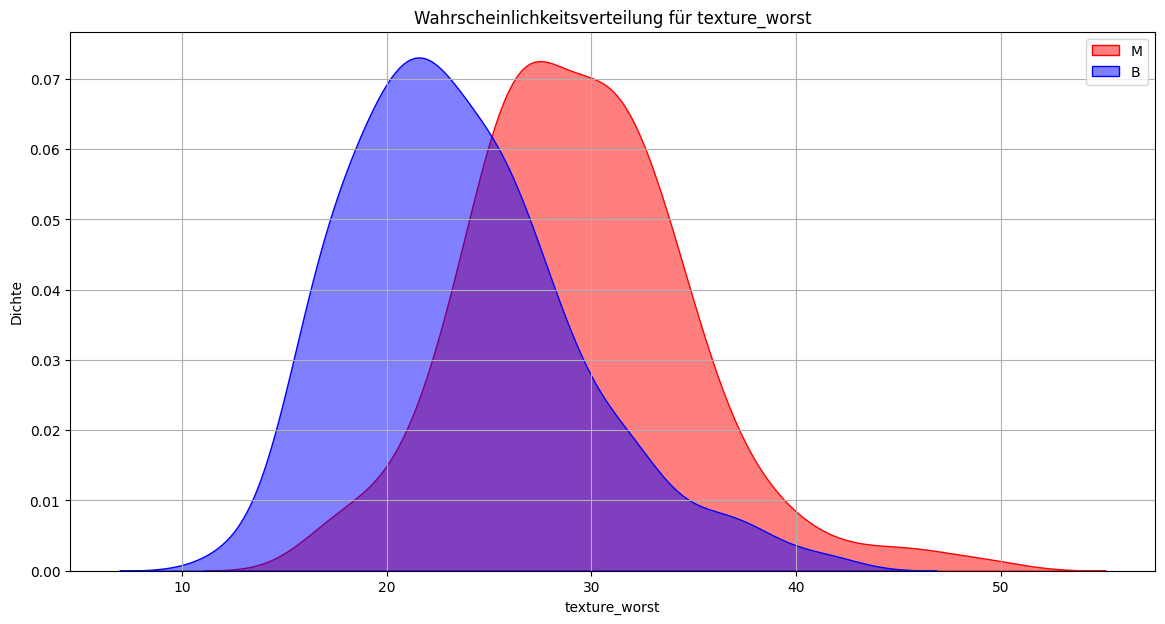

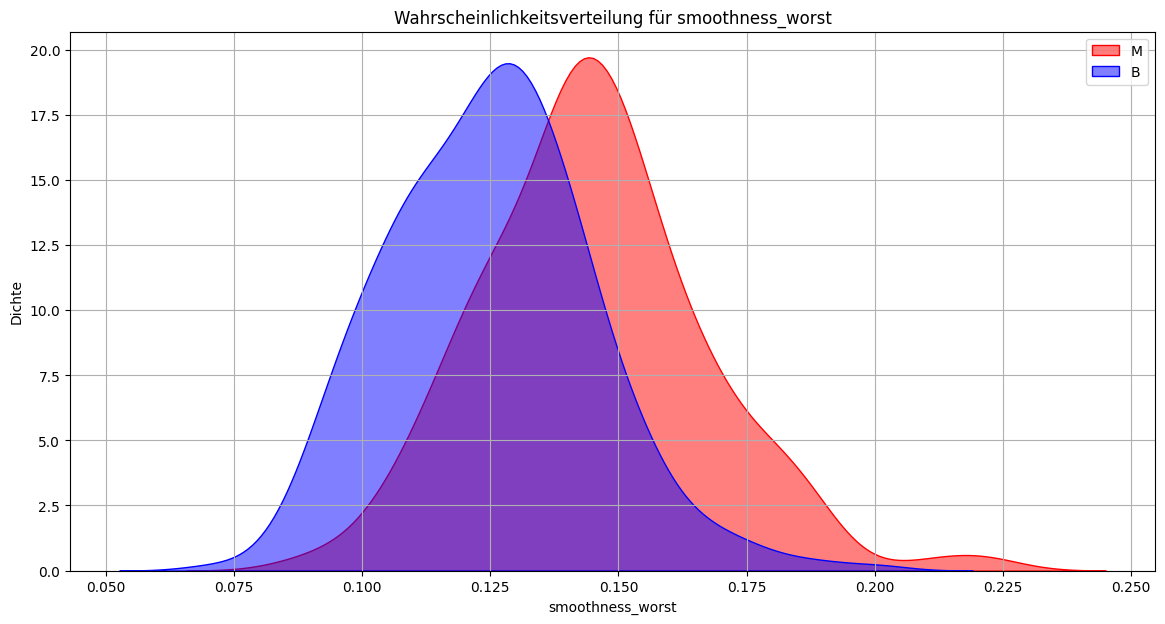

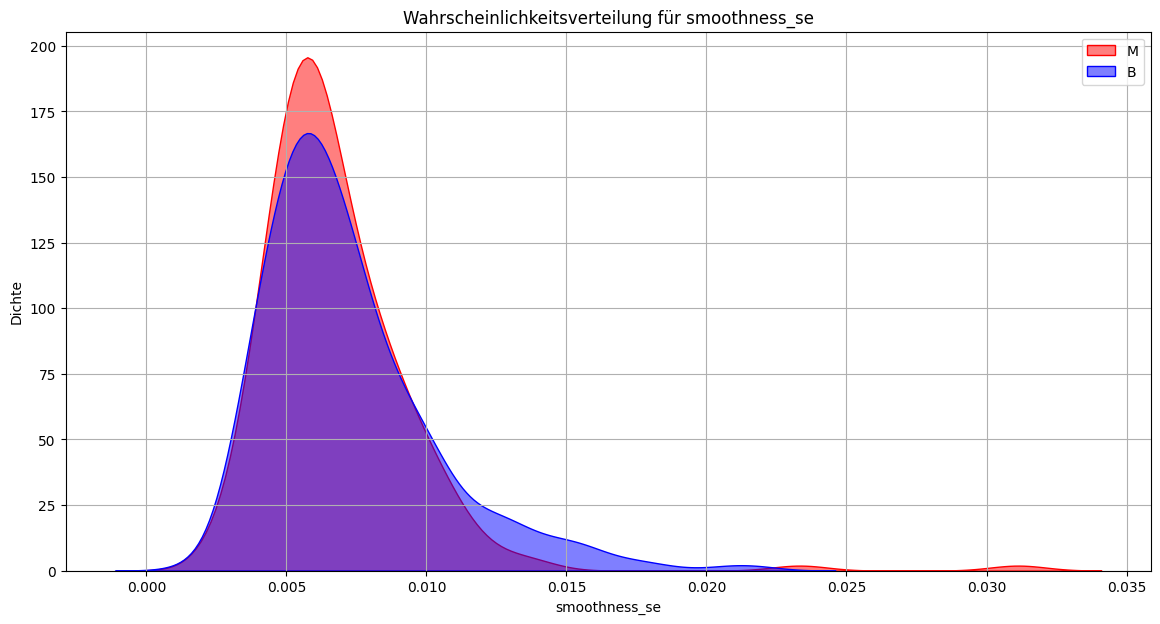

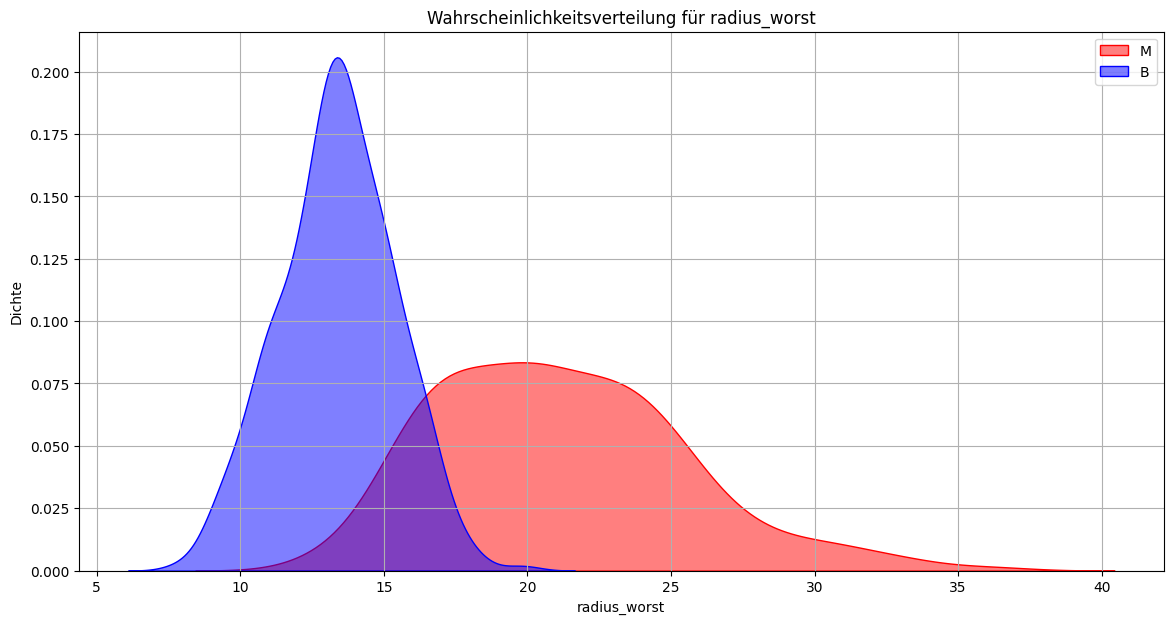

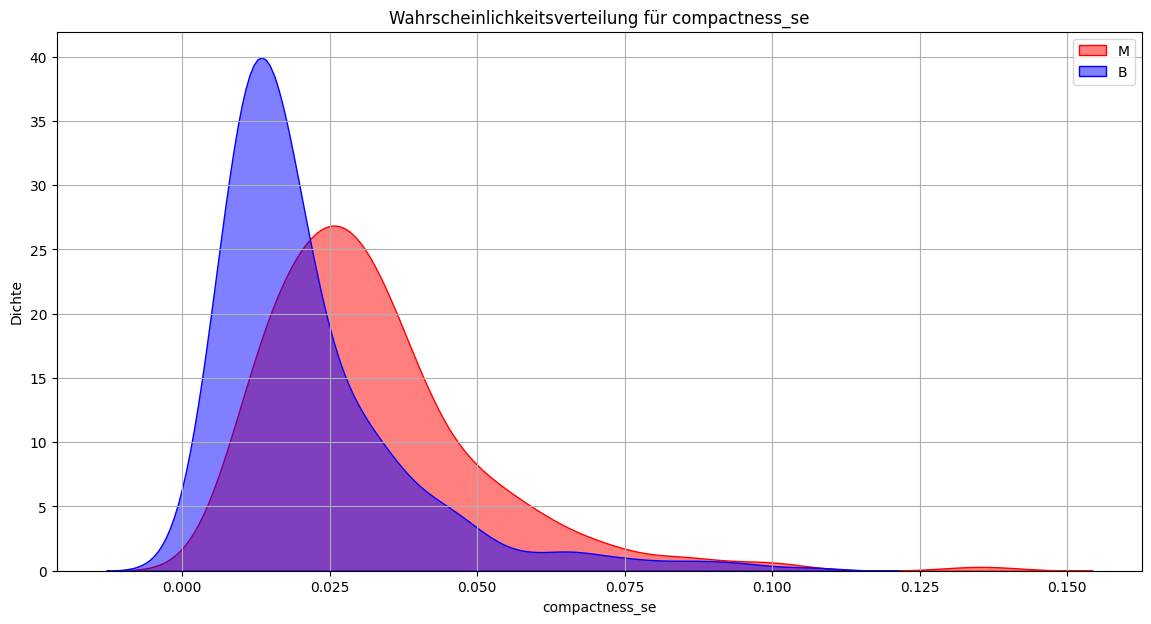

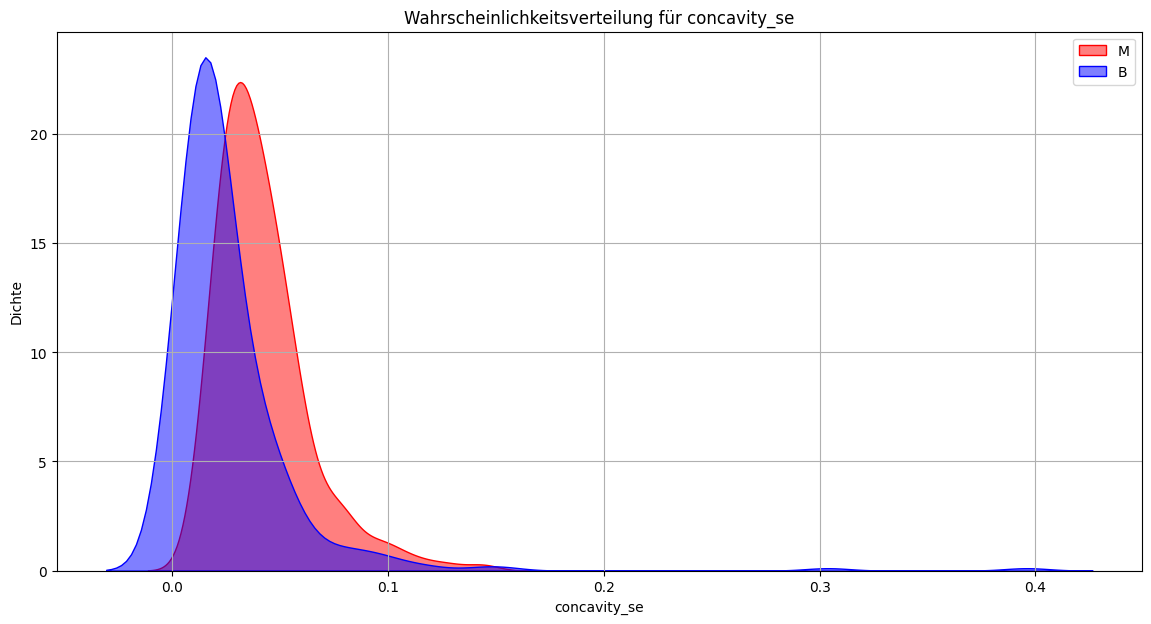

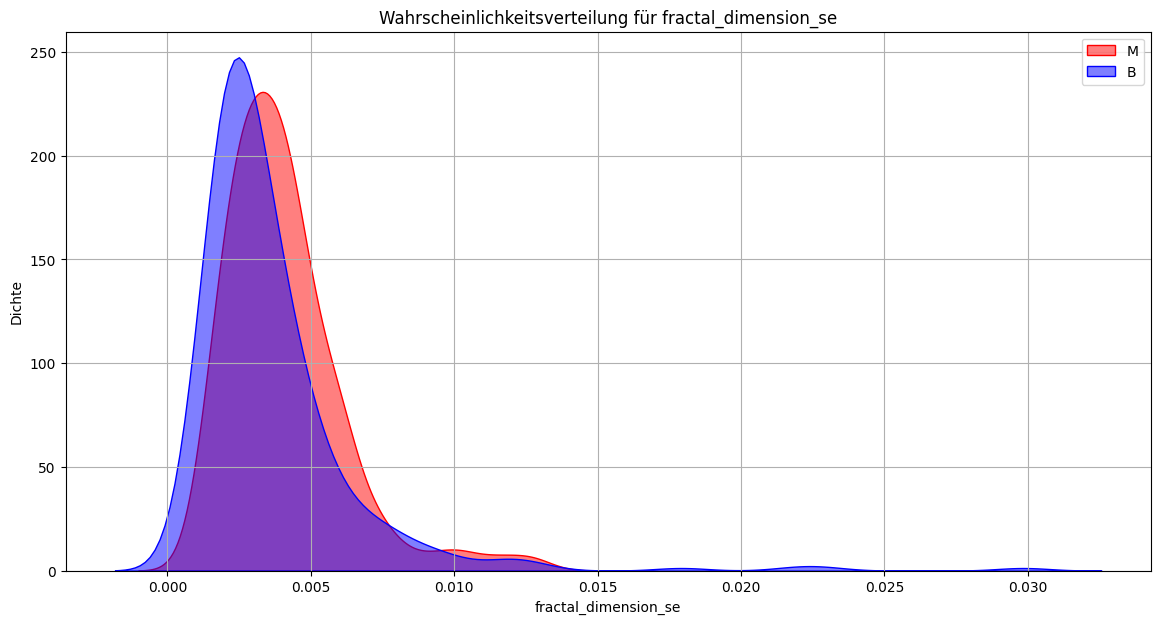

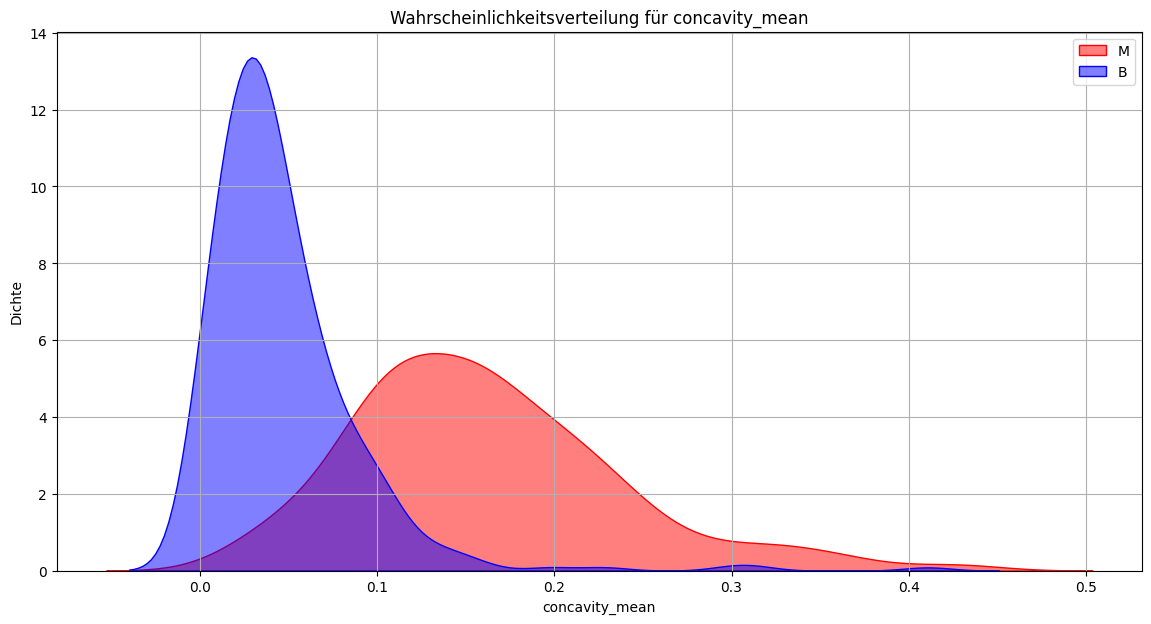

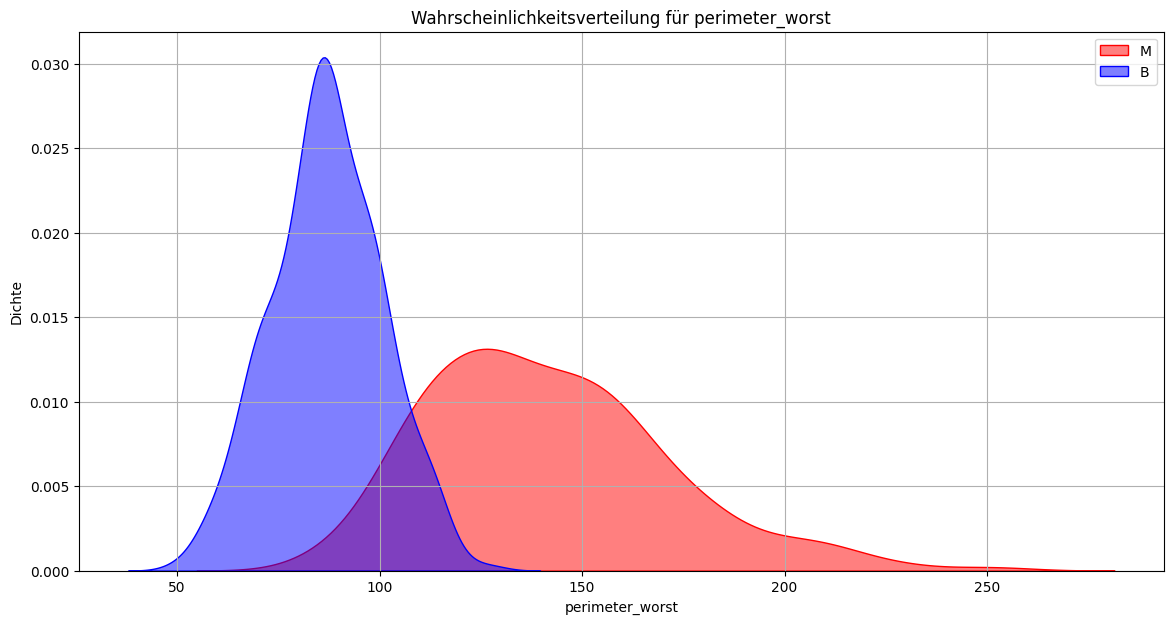

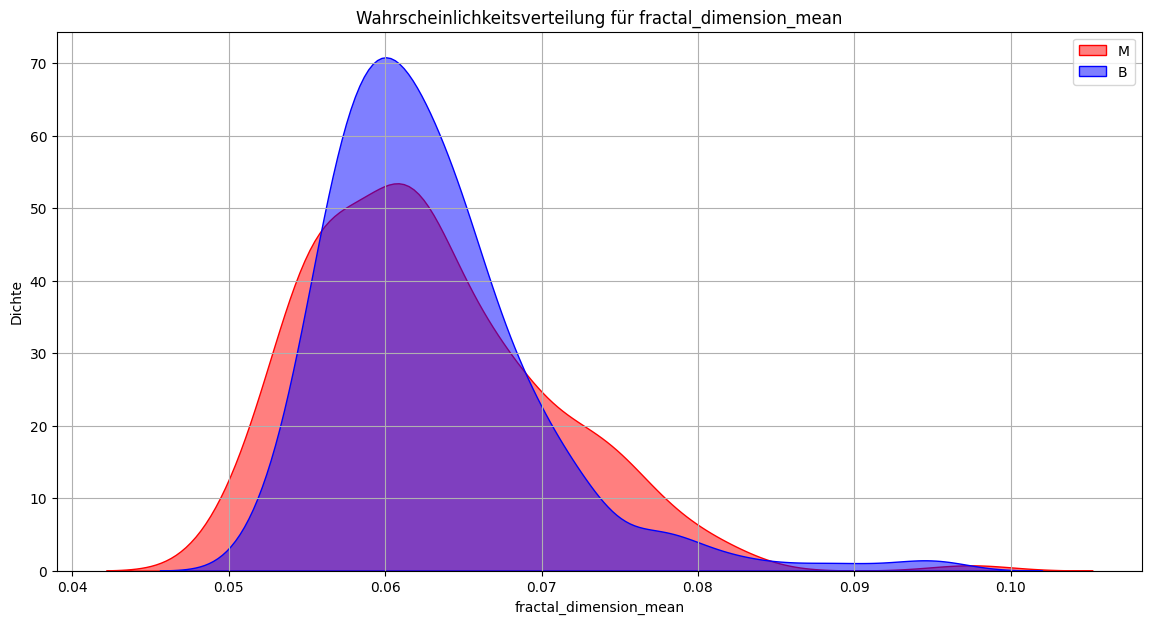

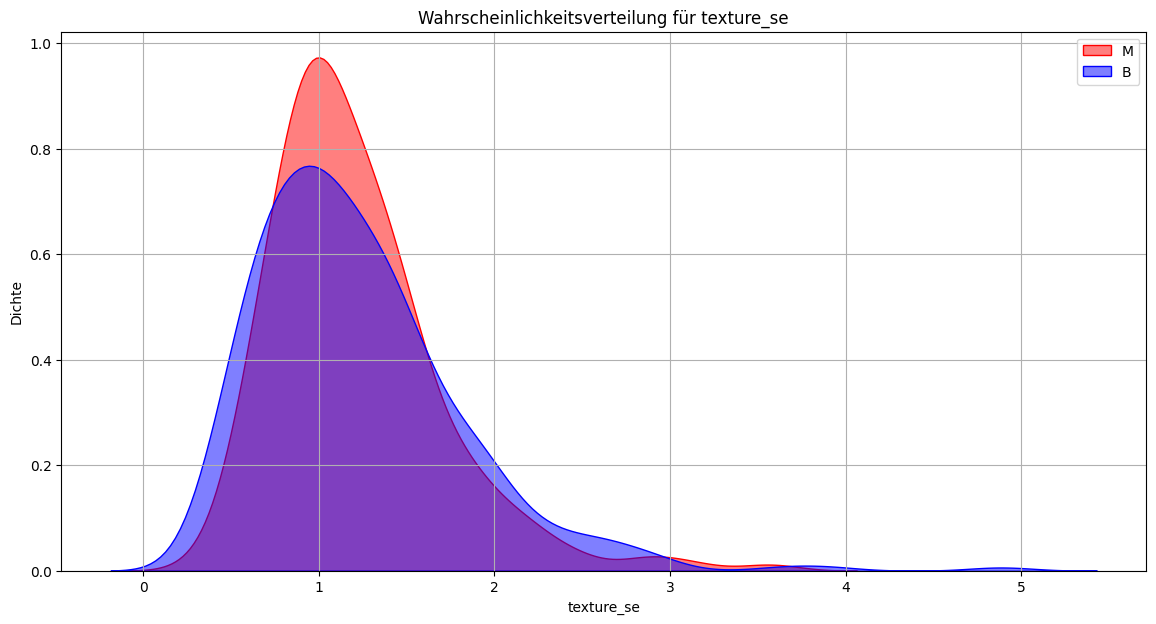

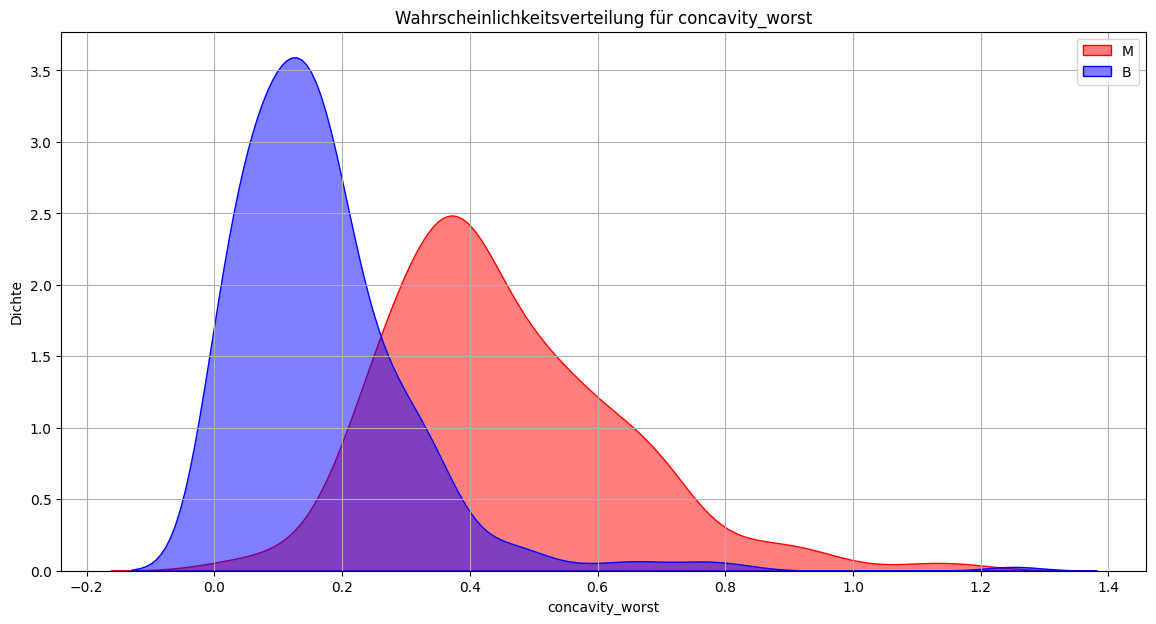

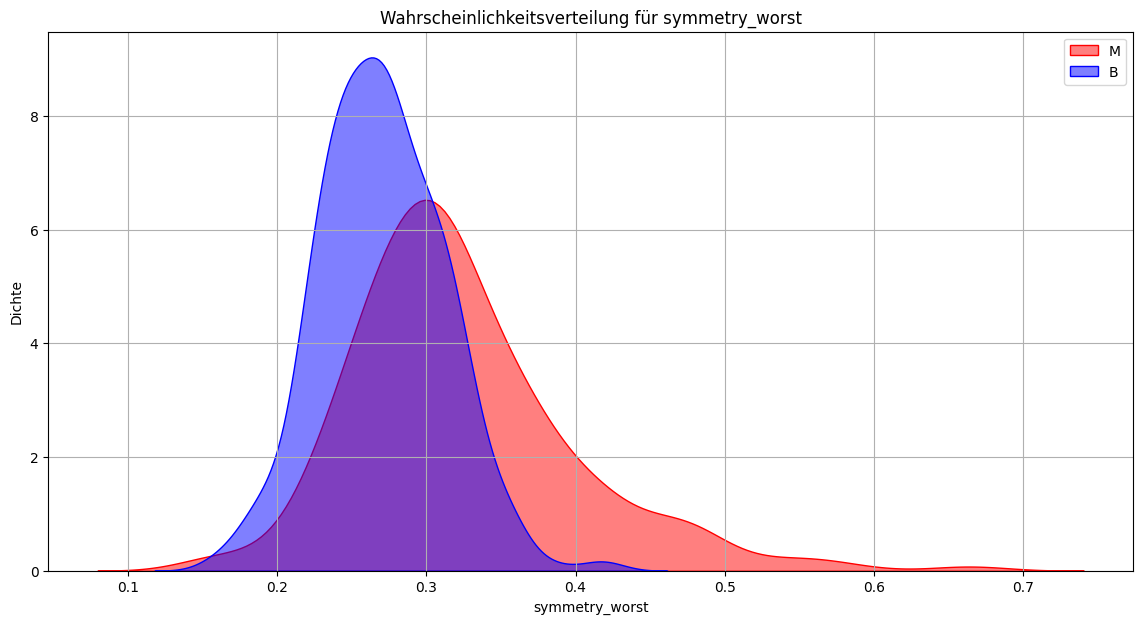

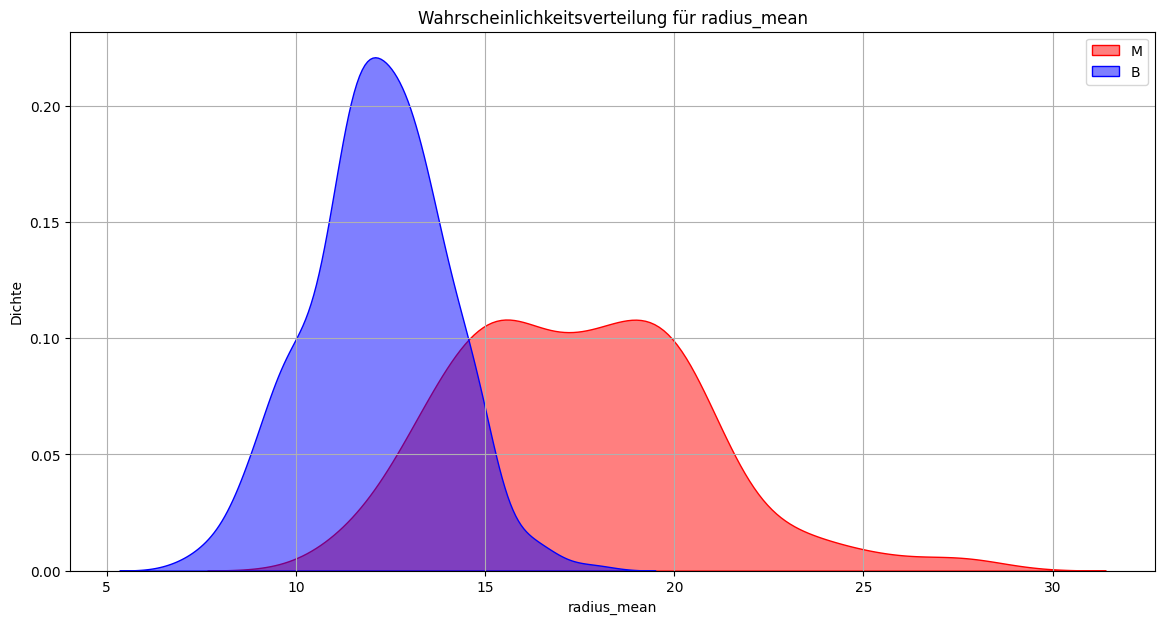

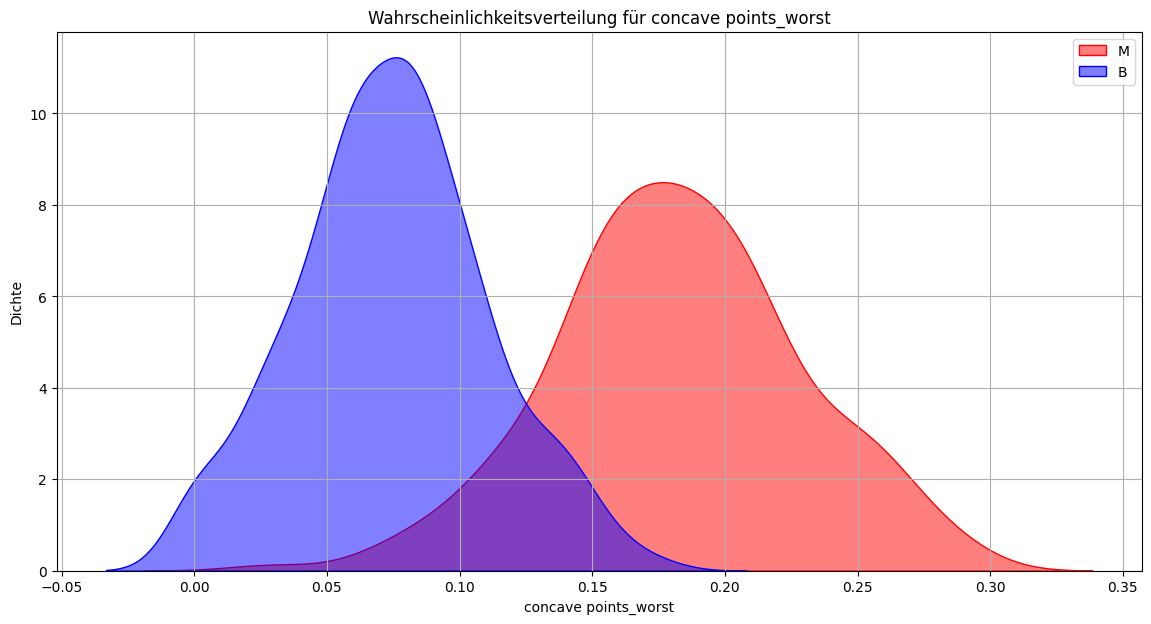

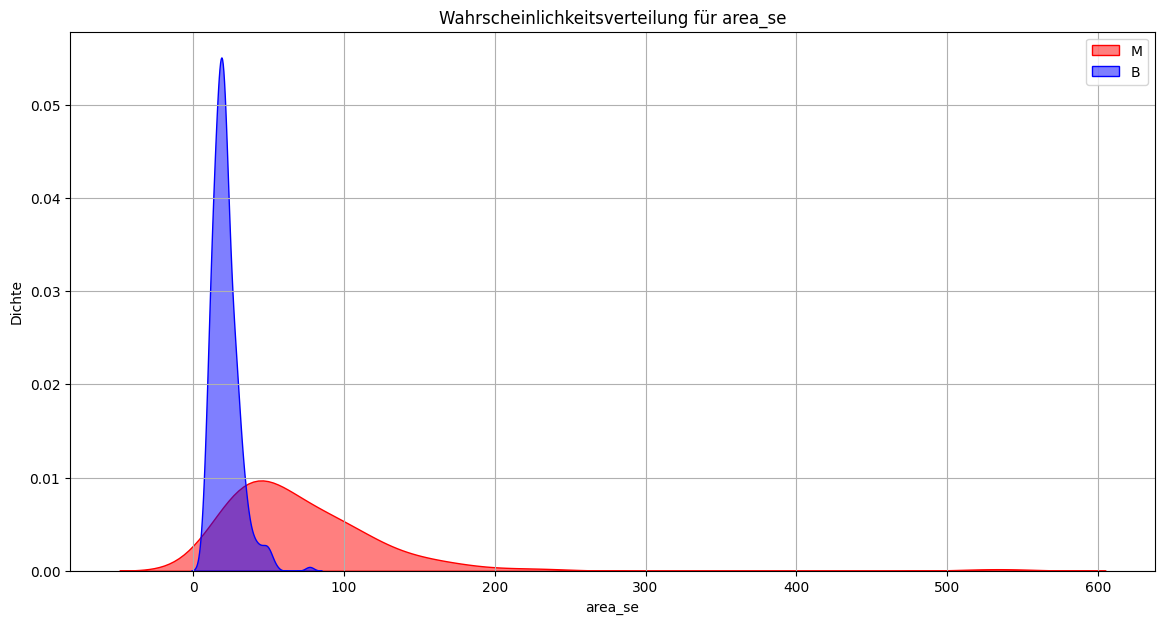

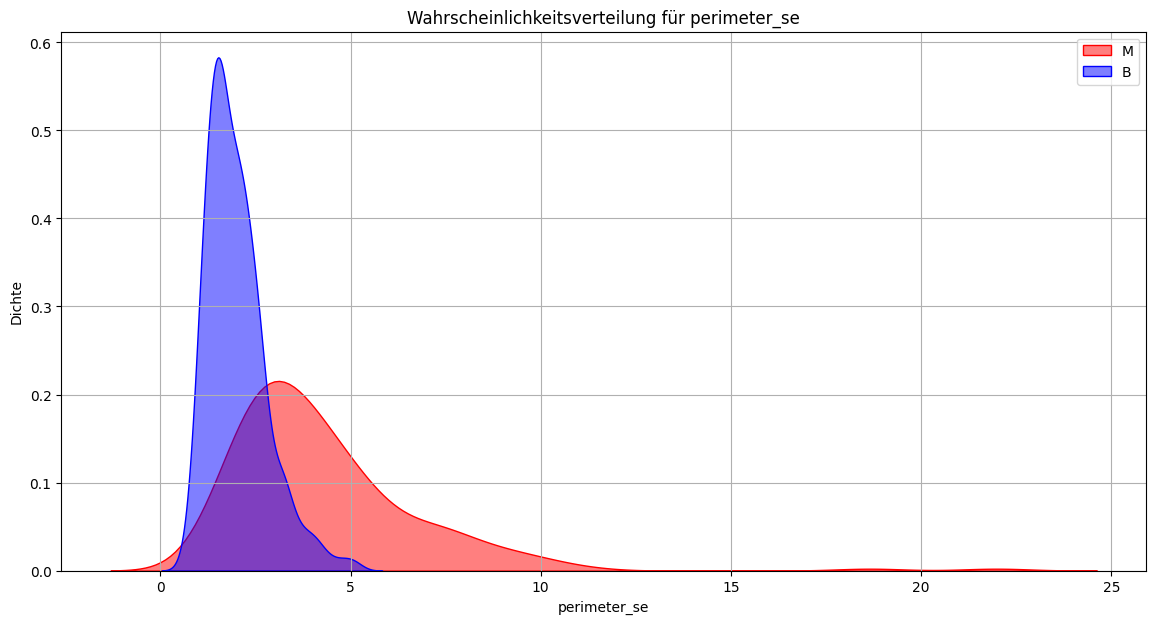

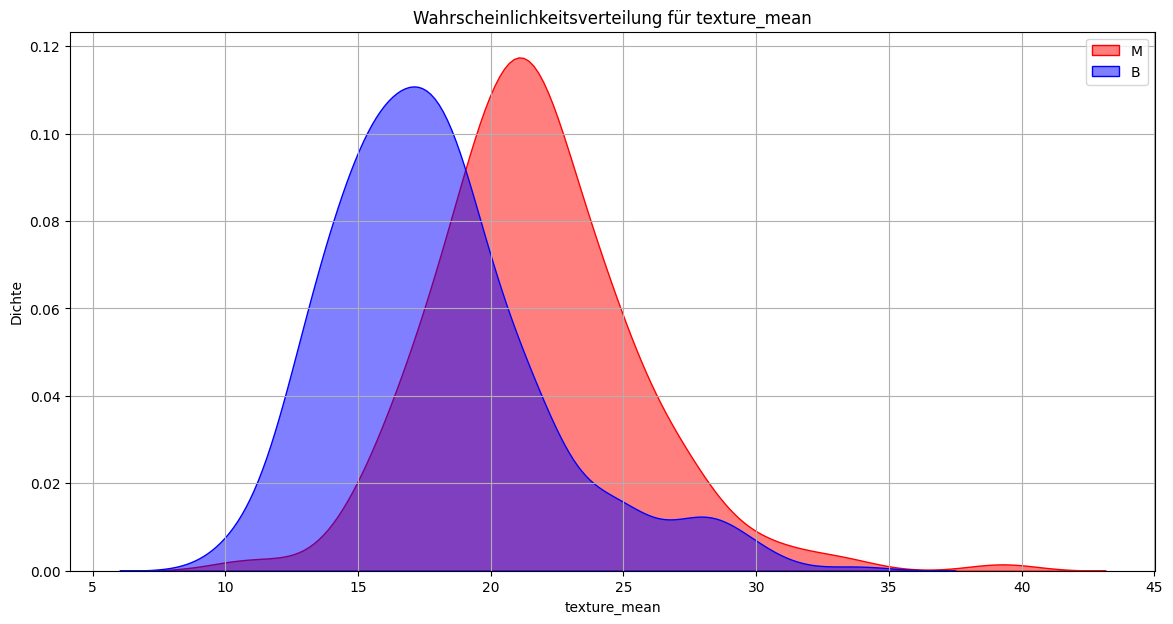

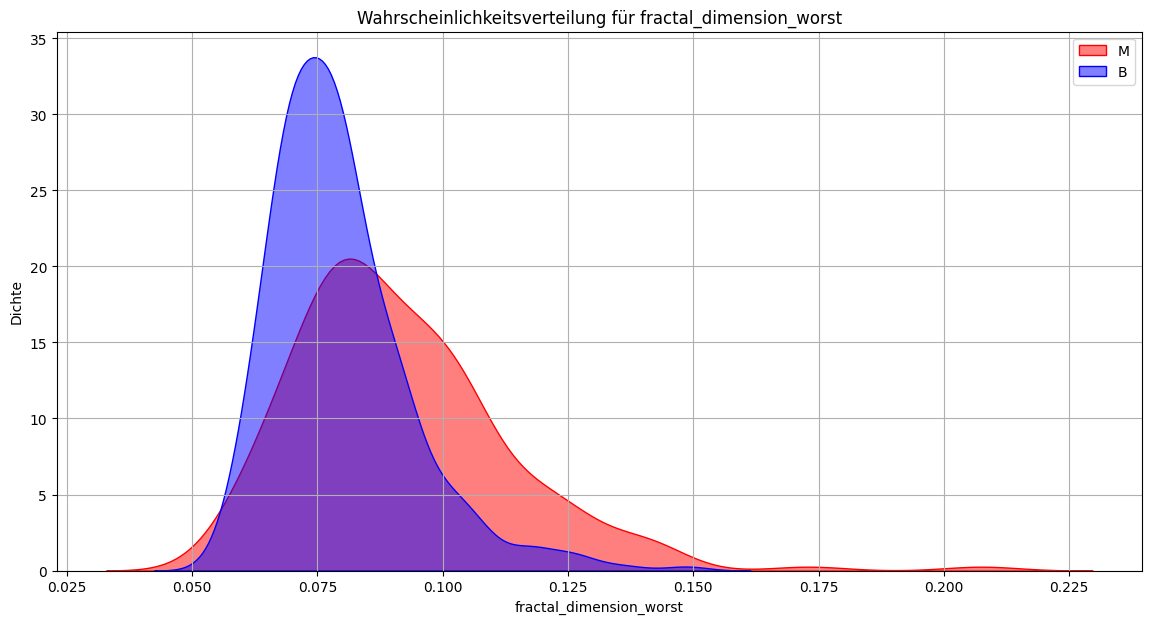

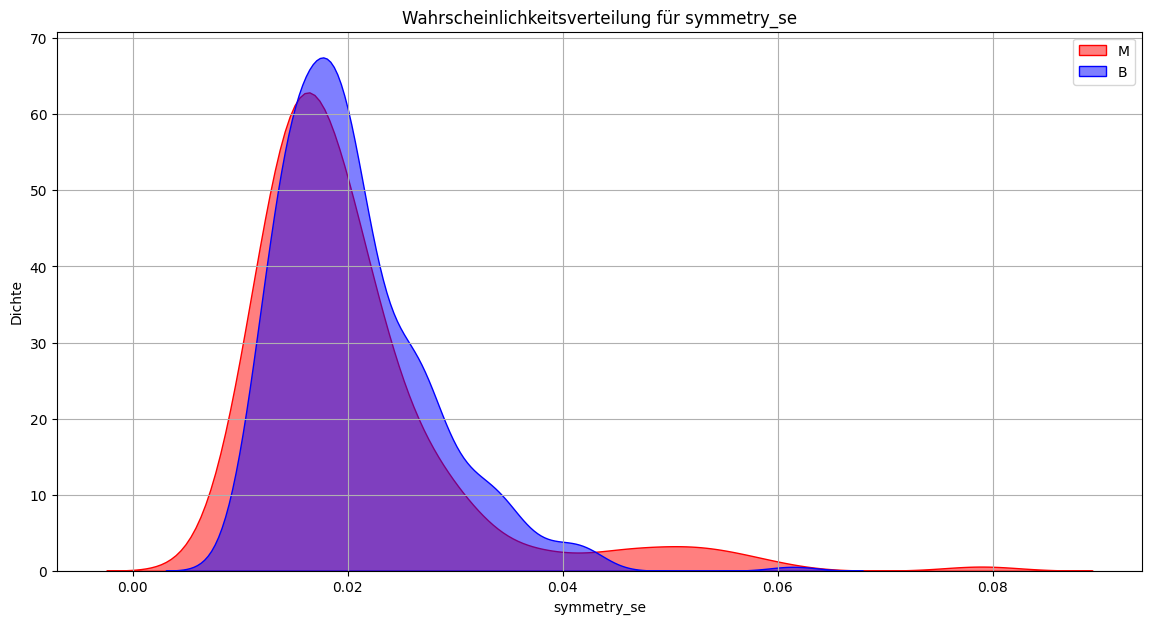

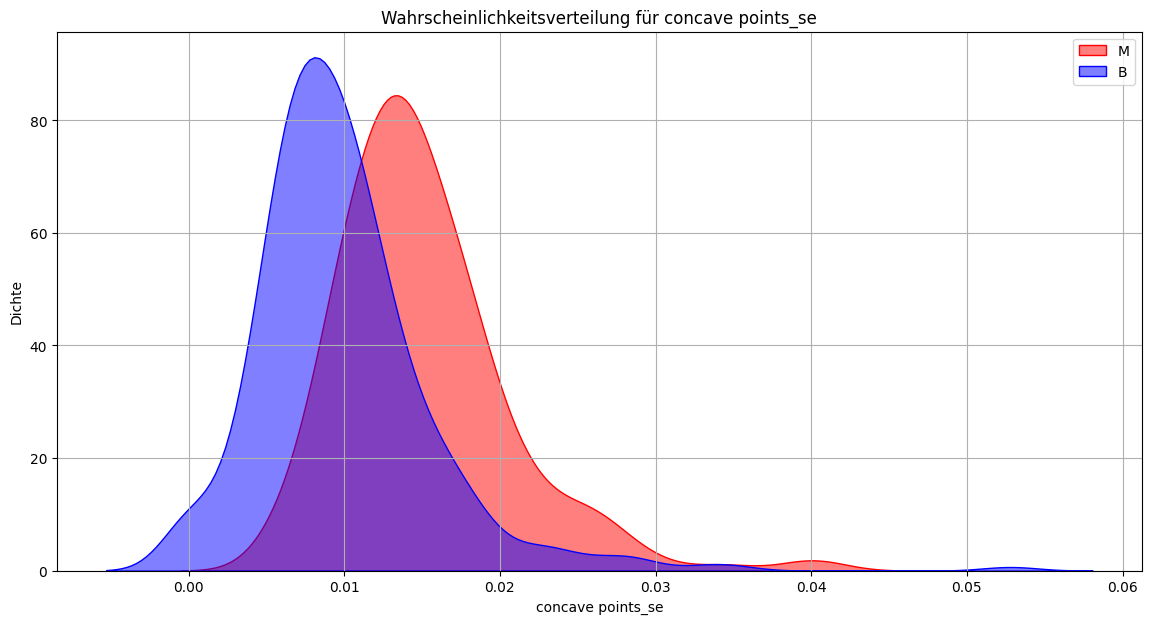

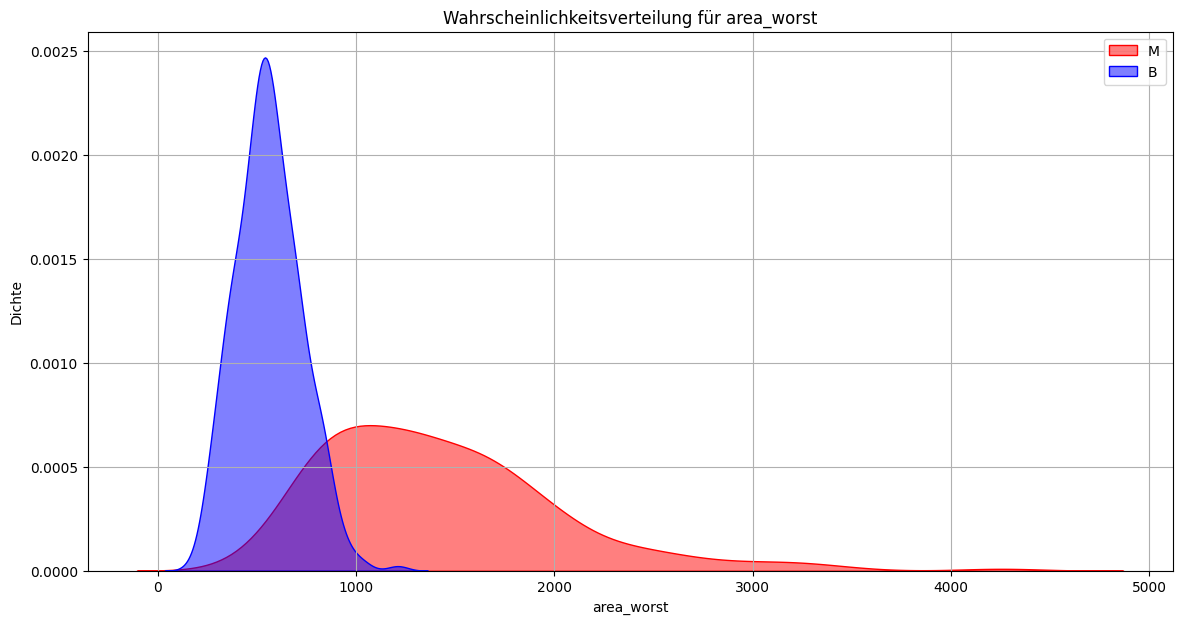

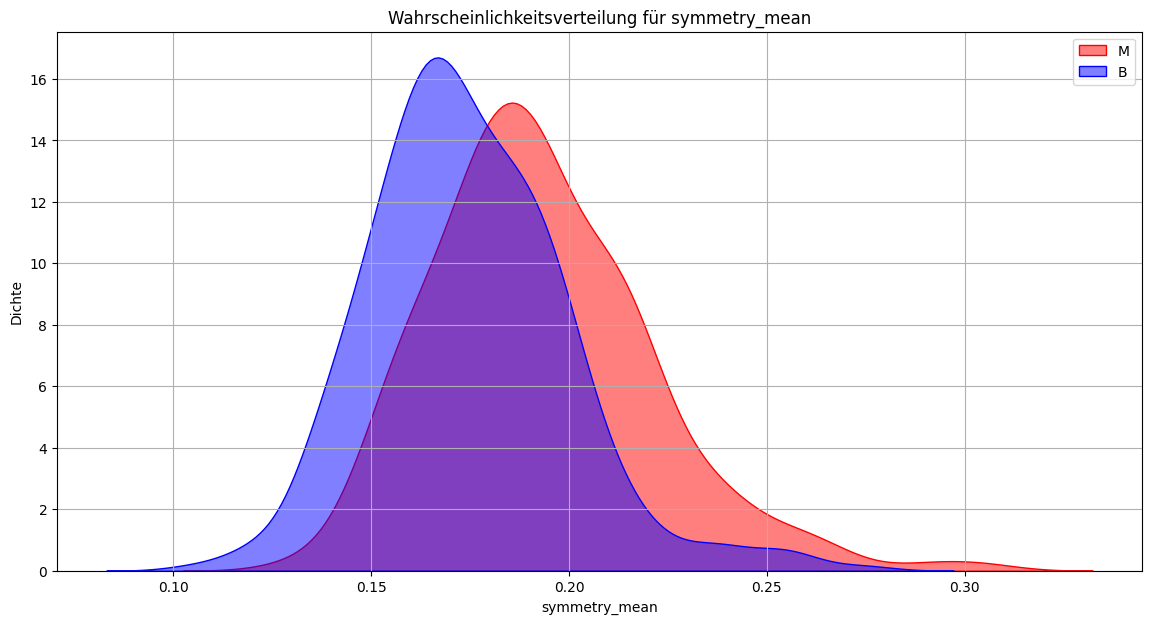

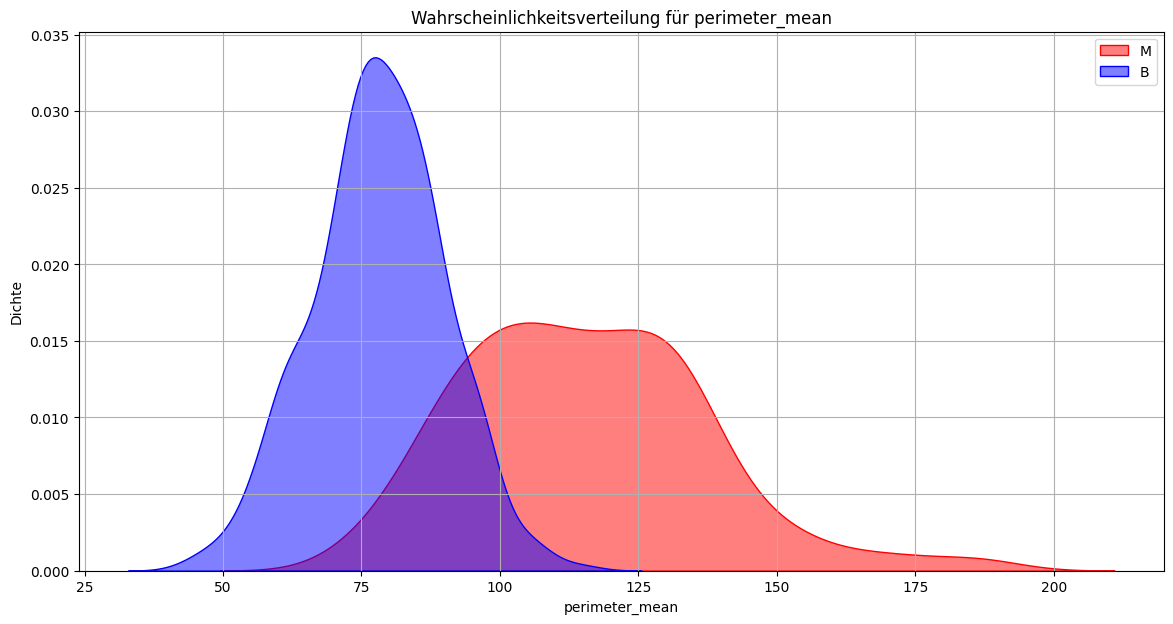

In [20]:
# Berechnung und Visualisierung der Verteilungen
output_folder_wahrscheinlichkeitsplots

for spalte in gemeinsame_spalten:
    if spalte != 'id':  # 'id' nicht mit einbeziehen
        plt.figure(figsize=(14, 7))
        
        # Verteilung für M und B plotten
        sns.kdeplot(data_m[spalte], label='M', color='red', fill=True, alpha=0.5)
        sns.kdeplot(data_b[spalte], label='B', color='blue', fill=True, alpha=0.5)
        
        plt.title(f'Wahrscheinlichkeitsverteilung für {spalte}')
        plt.xlabel(spalte)
        plt.ylabel('Dichte')
        plt.legend()
        plt.grid(True)


In [21]:
# Berechnung und Visualisierung der Verteilungen
for spalte in gemeinsame_spalten:
    if spalte != 'id':  # 'id' nicht mit einbeziehen
        plt.figure(figsize=(14, 7))
        
        # Verteilung für M und B plotten
        sns.kdeplot(data_m[spalte], label='M', color='red', fill=True, alpha=0.5)
        sns.kdeplot(data_b[spalte], label='B', color='blue', fill=True, alpha=0.5)
        
        plt.title(f'Wahrscheinlichkeitsverteilung für {spalte}')
        plt.xlabel(spalte)
        plt.ylabel('Dichte')
        plt.legend()
        plt.grid(True)

        # Plot als PNG-Datei speichern
        plot_path = os.path.join(output_folder_wahrscheinlichkeitsplots, f'wahrscheinlichkeit_{spalte}.png')
        plt.savefig(plot_path)
        plt.close()

print(f"Die Wahrscheinlichkeitsplots wurden im Ordner '{output_folder_wahrscheinlichkeitsplots}' gespeichert.")

Die Wahrscheinlichkeitsplots wurden im Ordner 'wahrscheinlichkeitsplots' gespeichert.


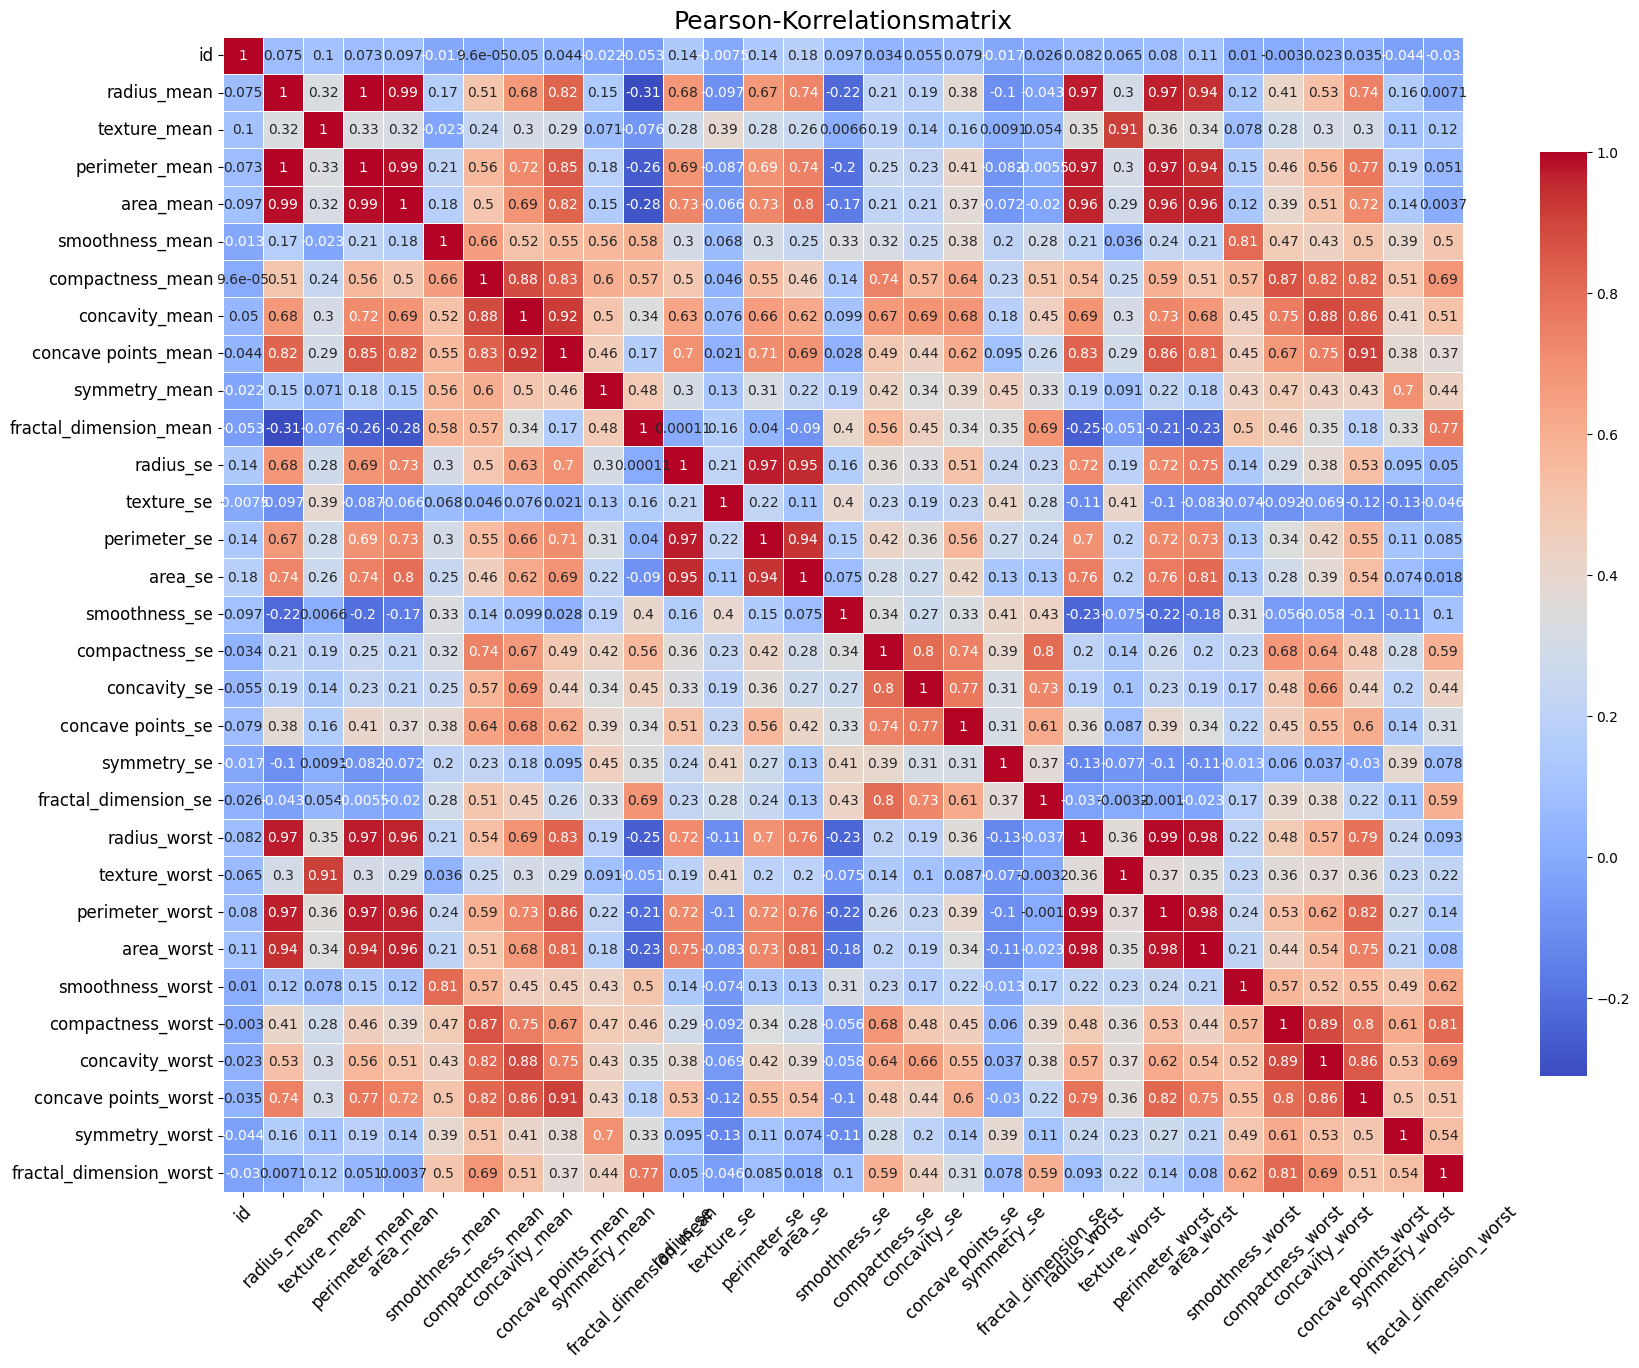

In [30]:
# Erstellung einer Korrelationsmatrix
data_combined = pd.concat([data_m, data_b])
numerische_spalten = data_combined.select_dtypes(include=['number'])
korrelation_matrix = numerische_spalten.corr(method='pearson')

# Heatmap zur Visualisierung der Korrelationen
plt.figure(figsize=(20, 15))  # Größere Figur für bessere Lesbarkeit
sns.heatmap(
    korrelation_matrix, 
    annot=True, 
    cmap='coolwarm', 
    linewidths=0.5, 
    annot_kws={"size": 10},  # Schriftgröße der Annotationen
    cbar_kws={"shrink": 0.8}  # Farbskala etwas kleiner darstellen
)
plt.title('Pearson-Korrelationsmatrix', fontsize=18)  # Größere Schriftgröße für den Titel
plt.xticks(fontsize=12, rotation=45)  # Achsenbeschriftung größer und schräg
plt.yticks(fontsize=12, rotation=0)   # Achsenbeschriftung größer und vertikal

heatmap_path = os.path.join(output_folder_korrelationsplots, 'korrelationsmatrix.png')

In [27]:
# Erstellung einer Korrelationsmatrix
data_combined = pd.concat([data_m, data_b])
numerische_spalten = data_combined.select_dtypes(include=['number'])
korrelation_matrix = numerische_spalten.corr(method='pearson')

# Heatmap zur Visualisierung der Korrelationen
plt.figure(figsize=(20, 15))  # Größere Figur für bessere Lesbarkeit
sns.heatmap(
    korrelation_matrix, 
    annot=True, 
    cmap='coolwarm', 
    linewidths=0.5, 
    annot_kws={"size": 10},  # Schriftgröße der Annotationen
    cbar_kws={"shrink": 0.8}  # Farbskala etwas kleiner darstellen
)
plt.title('Pearson-Korrelationsmatrix', fontsize=18)  # Größere Schriftgröße für den Titel
plt.xticks(fontsize=12, rotation=45)  # Achsenbeschriftung größer und schräg
plt.yticks(fontsize=12, rotation=0)   # Achsenbeschriftung größer und vertikal

heatmap_path = os.path.join(output_folder_korrelationsplots, 'korrelationsmatrix.png')
plt.savefig(heatmap_path)
plt.close()

print(f"Die Korrelationsanalyse wurde abgeschlossen. Die Heatmap wurde im Ordner '{output_folder_korrelationsplots}' gespeichert.")


Die Korrelationsanalyse wurde abgeschlossen. Die Heatmap wurde im Ordner 'korrelationsplots' gespeichert.
